# Integrated Project 1

In [1]:
%autosave 60

Autosaving every 60 seconds


## Table of Contents
* [Project Description](#description)
* [Step 1. Open the data file and study the general information](#step_1)
    * [Conclusion](#conclusion_1) 
* [Step 2. Data preprocessing](#step_2)
    * [Merging External Dataset](#step_2_1)
    * [Cleaning `year_of_release`](#step_2_2)
    * [Cleaning `Critic_Score`](#step_2_3)
    * [Cleaning `User_Score`](#step_2_4)
    * [Cleaning `rating` Column](#step_2_5)
    * [Calculating The Total Sales](#step_2_6)
    * [Conclusion](#conclusion_2)
* [Step 3. Analyze The Data](#step_3)
    * [Question 3.1: Look at how many games were released in different years.](#step_3_1)
    * [Question 3.2: Look at how sales varied from platform to platform.](#step_3_2)
    * [Question 3.3: Determine what period you should take data for.](#step_3_3)
    * [Question 3.4: Which platforms are leading in sales?](#step_3_4)
    * [Question 3.5: Build a box plot for the global sales of all games.](#step_3_5)
    * [Question 3.6: Take a look at how user and professional reviews affect sales.](#step_3_6)
    * [Question 3.7: Compare the sales of the same games on other platforms.](#step_3_7)
    * [Question 3.8: Take a look at the general distribution of games by genre.](#step_3_8)
    * [Conclusion](#conclusion_3)
* [Step 4. Hypothesis Testing](#step_4)
    * [Comparing Average Revenue](#step_4_1)
    * [Comparing Revenues from Different Areas](#step_4_2)
    * [Conclusion](#conclusion_4)
* [Step 5. Hypothesis Tests](#step_5)
    * [Testing hypothesis between average user ratings of the Xbox One and PC platforms](#step_5_1)
    * [Testing hypothesis between user ratings for the Action and Sports genres](#step_5_2)
    * [Conclusion](#conclusion_5)
* [Step 6. General Conclusion](#step_6)

## Project Description  <a class="anchor" id="description"></a>

We are given a dataset of video games sales from all over the world. The dataset includes user and expert reviews, genres, platforms, and historical data on game sales. Our task is to identify patterns that determine whether a game succeeds or not.

### Step 1. Load the dataset and study the general information <a class="anchor" id="step_1"></a>

In [2]:
# Import necessary libraries
import pandas as pd
from datetime import datetime as dt
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import mannwhitneyu, shapiro
from functools import reduce
plt.style.use('seaborn-muted')

import seaborn as sns
sns.set(rc={'axes.facecolor':'mintcream'})

try:
    sns.__version__ == '0.11.1'
except:
    !pip install seaborn==0.11.1 --user

try:
    import squarify
except ModuleNotFoundError:
    !pip install squarify --user
    import squarify
    
from io import BytesIO
import requests

We will use additional dataset to help us fill in some missing values in the dataset. The external dataset will be kept in the cloud and will be made available on the following [link](https://docs.google.com/spreadsheets/d/1ReAD-8kM56FiBXnNp51pdEOoL22S3_QmdTjfT57amNw/edit?usp=sharing):

In [3]:
url = 'https://docs.google.com/spreadsheets/d/1ReAD-8kM56FiBXnNp51pdEOoL22S3_QmdTjfT57amNw/edit?usp=sharing'

First, we load the dataset into a pandas dataframe,

In [4]:
try:
    df = pd.read_csv('games.csv') 
except:  
    df = pd.read_csv('/datasets/games.csv')

df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [5]:
df.tail()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.0,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.0,NaN,NaN,NaN
16714,Winning Post 8 2016,PSV,2016.0,Simulation,0.00,0.00,0.01,0.0,NaN,NaN,NaN


Showing ten random samples from the dataset,

In [6]:
df.sample(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
1490,Need for Speed Underground Rivals,PSP,2005.0,Racing,0.69,0.37,0.02,0.24,74.0,8.5,E
10297,NBA Live 16,XOne,2015.0,Sports,0.09,0.01,0.00,0.01,60.0,5.6,E
4167,Automobili Lamborghini,N64,1997.0,Racing,0.28,0.17,0.00,0.01,NaN,NaN,NaN
9875,Kidz Sports: Crazy Golf,Wii,2008.0,Sports,0.11,0.00,0.00,0.01,NaN,3.4,E
8813,Serious Sam,XB,2002.0,Shooter,0.11,0.03,0.00,0.01,75.0,8.2,M
6751,Ninja Gaiden 3,X360,2012.0,Action,0.16,0.05,0.03,0.02,58.0,4.4,M
4492,MLB 2002,PS,2001.0,Sports,0.24,0.16,0.00,0.03,76.0,8.1,E
3212,Crysis 3,PC,2013.0,Shooter,0.17,0.39,0.00,0.07,76.0,6.5,M
5377,Avatar: The Last Airbender - The Burning Earth,DS,2007.0,Action,0.31,0.00,0.00,0.03,NaN,NaN,NaN
16060,Worldwide Soccer Manager 2006,PC,2004.0,Sports,0.00,0.01,0.00,0.00,89.0,NaN,E


In [7]:
# Showing five largest values of sales form North America
df.nlargest(5,['NA_sales'])

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E


In [8]:
# Showing five smallest values of sales form North America
df.nsmallest(5,['NA_sales'])

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
215,Monster Hunter Freedom 3,PSP,2010.0,Role-Playing,0.0,0.00,4.87,0.00,NaN,NaN,NaN
340,Friend Collection,DS,2009.0,Misc,0.0,0.00,3.67,0.00,NaN,NaN,NaN
385,Monster Hunter 4,3DS,2013.0,Role-Playing,0.0,0.00,3.44,0.00,NaN,NaN,NaN
403,English Training: Have Fun Improving Your Skills!,DS,2006.0,Misc,0.0,0.99,2.32,0.02,NaN,NaN,NaN
428,Dragon Quest VI: Maboroshi no Daichi,SNES,1995.0,Role-Playing,0.0,0.00,3.19,0.00,NaN,NaN,NaN


The following code is for printing out statistical summaries, number of duplicates, number of missing values,
and unique values of every columns in the dataset.

In [9]:
def print_df_info(df):
    '''
    Print out the statistical summaries, number of duplicates, number of missing values,
    and unique values of every columns in the dataset.
    '''
    
    print("DATAFRAME INFO")
    print("----------------------------------------------------------------------")
    print(df.info())
    print("----------------------------------------------------------------------")
    print()
    print('DATAFRAME STATISTICAL INFO')
    print("----------------------------------------------------------------------")
    print(df.describe())
    print("----------------------------------------------------------------------")
    print()
    print('DATAFRAME MISSING VALUES AND DUPLICATED COLUMNS COUNTS')
    print("----------------------------------------------------------------------")
    print('Number of duplicate columns: {}'.format(df.duplicated().sum()))
    print('Number of missing values: \n{}'.format(df.isna().sum()))
    print()

    for col in df.columns:
        print('Column {} Value Counts'.format(col.upper()))
        print("----------------------------------------------------------------------")
        print(df[col].value_counts())
        print("----------------------------------------------------------------------")
        print()

Printing out the dataset summary:

In [10]:
print_df_info(df)

DATAFRAME INFO
----------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
None
----------------------------------------------------------------------

DATAFRAME STATISTICAL INFO
----------------------------------------------------------------------
       Year_of_Release      NA_sales      EU_sales      JP_sales  \
count     16446.000000  16715.000000  16715.000000  167

We can see that the dataset has missing values in some columns. To help us fill in the missing values, particularly for the `Year_of_Release` and `Critic_Score` columns, we will use an external dataset. The reason behind this is because we are trying to minimize guessworks which is the case if we are replacing the missing values with the median of other columns. For example, the release year is factual data and publicly available. We can scrape the web to find data of a game's release year. A more practical solution is finding a public dataset on the same topic. 

I found a [website](https://gr.blade.sk/#/) that provides game review [data](https://docs.google.com/spreadsheets/d/1wtV8yBr5RXAjO_1kakzFcHd7TKGw7pIUVNI5SYouCUM/edit#gid=782449831) which initially came from Gamerankings.com. GameRankings.com was a video gaming review aggregator that collect game reviews from other websites and magazines. The site was one of the earliest platforms that provide this kind of service to gaming industries and consumers, started in 1999 until Metacritic.com bought it in 2019.

In [11]:
# Showing unique data types in `User_Score`
df.User_Score.apply(type).unique()

array([<class 'str'>, <class 'float'>], dtype=object)

In [12]:
# Importing the Gamerankings dataset
try:
    gamerankings = pd.read_csv('gamerankings.csv')
except:
    spreadsheet_id = '1ReAD-8kM56FiBXnNp51pdEOoL22S3_QmdTjfT57amNw'
    file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_id)
    r = requests.get(file_name)
    gamerankings = pd.read_csv(BytesIO(r.content))

gamerankings.head()

,id,title,platform,year,avg score,reviews,developer,image,link,GameFAQs,bayesian avg,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
0,915692,Super Mario Galaxy,WII,2007,97.64,78,Nintendo,https://gamefaqs1.cbsistatic.com/box/5/9/7/555...,http://www.gamerankings.com/wii/915692-super-m...,https://gamefaqs.com/wii/915692-super-mario-ga...,97.45,NaN,Bayesian average info:,NaN,https://en.wikipedia.org/wiki/Bayesian_average
1,200275,Super Mario Odyssey,NS,2017,97.42,58,Nintendo,https://gamefaqs1.cbsistatic.com/box/6/6/2/616...,http://www.gamerankings.com/switch/200275-supe...,https://gamefaqs.com/switch/200275-super-mario...,97.16,NaN,avg rating,67.562226,NaN
2,805605,Grand Theft Auto V,XONE,2014,98.33,12,Rockstar North/Rockstar Games,https://gamefaqs1.cbsistatic.com/box/3/9/0/402...,http://www.gamerankings.com/xboxone/805605-gra...,https://gamefaqs.com/xboxone/805605-grand-thef...,97.10,NaN,bayes coef,0.500000,considers ratings with fewer votes less trustw...
3,189707,The Legend of Zelda: Breath of the Wild,NS,2017,97.33,63,Nintendo,https://gamefaqs1.cbsistatic.com/box/6/6/2/599...,http://www.gamerankings.com/switch/189707-the-...,https://gamefaqs.com/switch/189707-the-legend-...,97.10,NaN,iOS bayes coef,5.000000,"iOS ratings are even less trustworthy, using s..."
4,960551,Super Mario Galaxy 2,WII,2010,97.35,56,Nintendo EAD Tokyo /Nintendo,https://gamefaqs1.cbsistatic.com/box/8/2/8/113...,http://www.gamerankings.com/wii/960551-super-m...,https://gamefaqs.com/wii/960551-super-mario-ga...,97.09,NaN,NaN,NaN,NaN


In [13]:
# Selecting the required columns for our analysis
gamerankings = gamerankings.drop(columns=['id', 
                                          'reviews', 
                                          'developer', 
                                          'image', 
                                          'link', 
                                          'GameFAQs', 
                                          'bayesian avg', 
                                          'Unnamed: 11',
                                          'Unnamed: 12', 
                                          'Unnamed: 13', 
                                          'Unnamed: 14'])

gamerankings.columns = ['Name', 'Platform', 'GR_Year', 'GR_Score']
gamerankings.head()

,Name,Platform,GR_Year,GR_Score
0,Super Mario Galaxy,WII,2007,97.64
1,Super Mario Odyssey,NS,2017,97.42
2,Grand Theft Auto V,XONE,2014,98.33
3,The Legend of Zelda: Breath of the Wild,NS,2017,97.33
4,Super Mario Galaxy 2,WII,2010,97.35


In [14]:
# Describing non-numeric columns
df.describe(include=['object'])

,Name,Platform,Genre,User_Score,Rating
count,16713,16715,16713,10014,9949
unique,11559,31,12,96,8
top,Need for Speed: Most Wanted,PS2,Action,tbd,E
freq,12,2161,3369,2424,3990


In [15]:
# Printing out the summaries of `gameranking`
print_df_info(gamerankings)

DATAFRAME INFO
----------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28865 entries, 0 to 28864
Data columns (total 4 columns):
Name        28865 non-null object
Platform    28865 non-null object
GR_Year     28865 non-null int64
GR_Score    28865 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 902.2+ KB
None
----------------------------------------------------------------------

DATAFRAME STATISTICAL INFO
----------------------------------------------------------------------
            GR_Year      GR_Score
count  28865.000000  28865.000000
mean    2009.253733     69.777945
std        6.306413     13.177476
min     1969.000000      3.830000
25%     2005.000000     62.400000
50%     2010.000000     71.670000
75%     2014.000000     79.430000
max     2019.000000     98.330000
----------------------------------------------------------------------

DATAFRAME MISSING VALUES AND DUPLICATED COLUMNS COUNT

### Conclusion <a class="anchor" id="conclusion_1"></a>

Our dataset consists of 16715 rows by 11 columns, and six of them have missing values. The columns are `Name`, `Year_of_Release`, `Genre`, `Critic_Score`, `User_Score`, and `Rating`. Moreover, `User_Score` has rows marked as `TDB,` which we will examine later. To help us clean the data, we use an additional dataset that comprises video game reviews from GameRankings.com. From this dataset, we will take release years of different games and the reviewers' scores.

### Step 2. Data Preprocessing <a class="anchor" id="step_2"></a>

#### Merging External Dataset <a class="anchor" id="step_2_1"></a>

The first step we will take is replacing the missing values in `Year_of_Release` and `Critic_Score` with the data from `gamerankings`. Although the data of `gamerankings` will not going to replace all the missing values, this method is a better alternative than merely replacing them with median values. We need at least to see how many columns that `gamerankings` columns can fill in.

We are going to merge the datasets based on their names and platforms. But first, the values in the columns need to be converted into a lower case for convenience.

In [16]:
# Changing the values of df's `Name` and `Platform` columns into lowercase
df['Name'] = df['Name'].str.lower()
df['Platform'] = df['Platform'].str.lower()

# Changing the values of gameranking's `Name` and `Platform` columns into lowercase
gamerankings['Name'] = gamerankings['Name'].str.lower()
gamerankings['Platform'] = gamerankings['Platform'].str.lower()

# Changing the the column names into lowercase
df.columns = [col.lower() for col in df.columns]
gamerankings.columns = [col.lower() for col in gamerankings.columns]

Showing five random samples from the original dataset,

In [17]:
df.sample(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
9025,syndicate,ps3,2012.0,Shooter,0.07,0.06,0.00,0.02,75.0,6.5,M
8827,final fantasy xi: vana'diel collection 2008,x360,2007.0,Role-Playing,0.13,0.00,0.01,0.01,NaN,tbd,T
3709,system 3 presents ferrari challenge trofeo pir...,wii,2008.0,Racing,0.07,0.40,0.00,0.07,NaN,NaN,NaN
9978,ash: archaic sealed heat,ds,2007.0,Role-Playing,0.00,0.00,0.12,0.00,NaN,NaN,E10+
11744,conception: please give birth to my child!,psp,2012.0,Role-Playing,0.00,0.00,0.08,0.00,NaN,NaN,NaN


Showing five random samples from the gamerankings dataset,

In [18]:
gamerankings.sample(5)

,name,platform,gr_year,gr_score
10591,transworld surf,xbox,2001,74.33
3704,borderlands: the zombie island of dr. ned,x360,2009,82.20
27677,kazook,psp,2006,43.75
1870,stacking,ps3,2011,85.36
3069,skate 2,ps3,2009,83.02


`gamerankings` consist of game data until 2019. We need to take only data that until 2016,

In [19]:
# Removing data from 2017 onward
gamerankings = gamerankings[gamerankings['gr_year'] <= 2016]

We need to check if both datasets have the same abbreviations for platform names. This is to make sure that the data can be merge as much as possible.

In [20]:
# Turning series into lists
df_cols = df.platform.to_list()
gr_cols = gamerankings.platform.to_list()

We can easily find platforms in `gamerankings` that do not exist in `df` using the set operation:

In [21]:
set(gr_cols) - set(df_cols)

{'gbc', 'ios', 'mac', 'mobi', 'nge', 'vita', 'xbox'}

We can easily find platforms in `gamerankings` that do not exist in `df` using the set operation: Among the names in the above set, there are titles in `df` but recorded under different names. For example, `vita` in `gamerankings` is called `psv` in `df`, and `xbox` is `xb`. We will convert these two and leave other titles as they are.

In [22]:
def correct_platform_name(val):
    '''
    A function to convert abbreviations in gameranking dataset 
    into a recognized abbreviation in original dataset
    '''
    if val == 'vita':
        return 'psv'
    elif val == 'xbox':
        return 'xb'
    else:
        return val

Applying the function on `gamerankings`,

In [23]:
# Replacing the titles in platform
gamerankings['platform'] = gamerankings['platform'].apply(correct_platform_name)

Now we can merge `gamerankings` into `df` based on `name` and `platform`,

In [24]:
merged = df.merge(gamerankings, on=['name', 'platform'], how='left')

We have a new dataframe called `merged` that has new columns `gr_year` and `gr_score` from `gamerankings` dataset. Evaluating the head and tail of `merged`,

In [25]:
merged.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,gr_year,gr_score
0,wii sports,wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E,2006.0,76.28
1,super mario bros.,nes,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,NaN,NaN
2,mario kart wii,wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,2008.0,82.07
3,wii sports resort,wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E,2009.0,82.65
4,pokemon red/pokemon blue,gb,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,NaN,NaN


In [26]:
merged.tail()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,gr_year,gr_score
16710,samurai warriors: sanada maru,ps3,2016.0,Action,0.00,0.00,0.01,0.0,NaN,NaN,NaN,NaN,NaN
16711,lma manager 2007,x360,2006.0,Sports,0.00,0.01,0.00,0.0,NaN,NaN,NaN,2006.0,67.72
16712,haitaka no psychedelica,psv,2016.0,Adventure,0.00,0.00,0.01,0.0,NaN,NaN,NaN,NaN,NaN
16713,spirits & spells,gba,2003.0,Platform,0.01,0.00,0.00,0.0,NaN,NaN,NaN,NaN,NaN
16714,winning post 8 2016,psv,2016.0,Simulation,0.00,0.00,0.01,0.0,NaN,NaN,NaN,NaN,NaN


Now we replace the values of `year_of_release` and `critic_score` with `gr_year` and `gr_score` respectively. 

In [27]:
# Creating new columns that take rows from a second column for every missing values in the first column`
merged['year_combined'] =  merged['year_of_release'].fillna(value=merged['gr_year'])
merged['critic_score_combined'] = merged['critic_score'].fillna(value=merged['gr_score'])

We can evaluate how many missing values have been replaced so far,

In [28]:
print("The number of missing values in year_of_release:\n\
        \tBefore merging: {}\n\
        \tAfter merging: {}\n\
        \tPercent reduction: {:.2%}\n".
      format(merged.isna().sum()['year_of_release'], 
             merged.isna().sum()['year_combined'],
             (1-merged.isna().sum()['year_combined']/merged.isna().sum()['year_of_release'])))

print("The number of missing values in critic_score:\n\
        \tBefore merging: {}\n\
        \tAfter merging: {}\n\
        \tPercent reduction: {:.2%}".
      format(merged.isna().sum()['critic_score'], 
             merged.isna().sum()['critic_score_combined'],
             (1-merged.isna().sum()['gr_score']/merged.isna().sum()['critic_score'])))

The number of missing values in year_of_release:
        	Before merging: 269
        	After merging: 114
        	Percent reduction: 57.62%

The number of missing values in critic_score:
        	Before merging: 8578
        	After merging: 6818
        	Percent reduction: 13.69%


The merging process led us to 58% and 14% reduction in `year_of_release` and `critic_score` respectively.

Cleaning the column titles by deleting the ones we do not need:

In [29]:
# Dropping the columns we don't need
merged = merged.drop(columns=['critic_score', 'gr_year', 'gr_score', 'year_of_release'])
merged.columns  = ['name', 'platform', 'genre', 'na_sales', 'eu_sales', 'jp_sales',
       'other_sales', 'user_score', 'rating', 'year_of_release',
       'critic_score']

In [30]:
merged.head()

,name,platform,genre,na_sales,eu_sales,jp_sales,other_sales,user_score,rating,year_of_release,critic_score
0,wii sports,wii,Sports,41.36,28.96,3.77,8.45,8,E,2006.0,76.0
1,super mario bros.,nes,Platform,29.08,3.58,6.81,0.77,NaN,NaN,1985.0,NaN
2,mario kart wii,wii,Racing,15.68,12.76,3.79,3.29,8.3,E,2008.0,82.0
3,wii sports resort,wii,Sports,15.61,10.93,3.28,2.95,8,E,2009.0,80.0
4,pokemon red/pokemon blue,gb,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,1996.0,NaN


In [31]:
merged.tail()

,name,platform,genre,na_sales,eu_sales,jp_sales,other_sales,user_score,rating,year_of_release,critic_score
16710,samurai warriors: sanada maru,ps3,Action,0.00,0.00,0.01,0.0,NaN,NaN,2016.0,NaN
16711,lma manager 2007,x360,Sports,0.00,0.01,0.00,0.0,NaN,NaN,2006.0,67.72
16712,haitaka no psychedelica,psv,Adventure,0.00,0.00,0.01,0.0,NaN,NaN,2016.0,NaN
16713,spirits & spells,gba,Platform,0.01,0.00,0.00,0.0,NaN,NaN,2003.0,NaN
16714,winning post 8 2016,psv,Simulation,0.00,0.00,0.01,0.0,NaN,NaN,2016.0,NaN


**Cleaning `year_of_release`** <a class="anchor" id="step_2_2"></a>

There are still 113 missing values in the `year_of_release` column. To continue our work, we can group them by platform and take the median of every title. This is because there are titles that were released on various platforms at the same time. Using this assumption, the `year_of_release` of a single game will most likely be similar.

In [32]:
year_on_name = merged.groupby('name')['year_of_release'].apply(lambda x: x.median())

/Users/w.persadha/opt/anaconda3/envs/practicum/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1113: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


In [33]:
# Define a function that checks if a row is `NaN` then replace them with a row from other dataframe
def replace_year(row, df):
    if np.isnan(row['year_of_release']):
        return df.loc[row['name']]
    else:
        return row['year_of_release']
    
merged['year_of_release'] = merged.apply(replace_year, df=year_on_name, axis=1)

Checking the number of `NaN` left,

In [34]:
print("The number of missing values in year_of_release:\n\
        \tBefore merging: {}\n\
        \tAfter merging: {}\n\
        \tPercent reduction: {:.2%}\n".
      format(df.isna().sum()['year_of_release'], 
             merged.isna().sum()['year_of_release'],
             (1-merged.isna().sum()['year_of_release']/df.isna().sum()['year_of_release'])))

The number of missing values in year_of_release:
        	Before merging: 269
        	After merging: 80
        	Percent reduction: 70.26%



This step succesfully reduced missing values in `years_of_release` further to 70% from the initial step.

Finally the last 80 `NaN`s will be replaced by the median year of each platform,

In [35]:
merged['year_of_release'] = merged.groupby(['platform'])['year_of_release'].transform(lambda x: x.fillna(x.median()))

In [36]:
merged.isna().sum()

name                  2
platform              0
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
user_score         6701
rating             6766
year_of_release       0
critic_score       6818
dtype: int64

**Cleaning `Critic_Score`** <a class="anchor" id="step_2_3"></a>

In the previous step, we have reduced the number of missing values in `critic_score` by importing data from an external dataset. To fill in the remaining values, we can try to group the data by their names and platforms. Still, we can see that this method will not help us since there are also `NaN` values after grouping (i.e., the game titled 'Beyblade Burst' in the table below)

In [37]:
merged.groupby(['name', 'platform']).median()

na_sales  eu_sales  \
name                                          platform                       
 beyblade burst                               3ds           0.00      0.00   
 fire emblem fates                            3ds           0.81      0.23   
 frozen: olaf's quest                         3ds           0.27      0.27   
                                              ds            0.21      0.26   
 haikyu!! cross team match!                   3ds           0.00      0.00   
...                                                          ...       ...   
zumba fitness: world party                    wii           0.11      0.10   
                                              xone          0.17      0.05   
zwei!!                                        psp           0.00      0.00   
zyuden sentai kyoryuger: game de gaburincho!! 3ds           0.00      0.00   
¡shin chan flipa en colores!                  ds            0.00      0.00   

                                                        jp_sales  other_sales  \
name                                          platform                          
 beyblade burst                               3ds           0.03         0.00   
 fire emblem fates                            3ds           0.52         0.11   
 frozen: olaf's quest                         3ds           0.00         0.05   
                                              ds            0.00         0.04   
 haikyu!! cross team match!                   3ds           0.04         0.00   
...                                                          ...          ...   
zumba fitness: world party                    wii           0.00         0.02   
                                              xone          0.00         0.02   
zwei!!                                        psp           0.02         0.00   
zyuden sentai kyoryuger: game de gaburincho!! 3ds           0.05         0.00   
¡shin chan flipa en colores!                  ds            0.14         0.00   

                                                        year_of_release  \
name                                          platform                    
 beyblade burst                               3ds                2016.0   
 fire emblem fates                            3ds                2015.0   
 frozen: olaf's quest                         3ds                2013.0   
                                              ds                 2013.0   
 haikyu!! cross team match!                   3ds                2016.0   
...                                                                 ...   
zumba fitness: world party                    wii                2013.0   
                                              xone               2013.0   
zwei!!                                        psp                2008.0   
zyuden sentai kyoryuger: game de gaburincho!! 3ds                2013.0   
¡shin chan flipa en colores!                  ds                 2007.0   

                                                        critic_score  
name                                          platform                
 beyblade burst                               3ds                NaN  
 fire emblem fates                            3ds                NaN  
 frozen: olaf's quest                         3ds                NaN  
                                              ds                 NaN  
 haikyu!! cross team match!                   3ds                NaN  
...                                                              ...  
zumba fitness: world party                    wii                NaN  
                                              xone              73.0  
zwei!!                                        psp                NaN  
zyuden sentai kyoryuger: game de gaburincho!! 3ds                NaN  
¡shin chan flipa en colores!                  ds                 NaN  

[16709 rows x 6 columns]

Another approach we can try is to find the median of `name` in each genre. But there are problems with this method; the first one is that it does not make sense if we assume that the average score of a genre can be fitted into every single title in the same genre. Another problem is that the grouping will also give out `NaN` values.

In [38]:
merged.groupby(['name', 'genre']).median()

,,na_sales,eu_sales,jp_sales,other_sales,year_of_release,critic_score
name,genre,,,,,,
beyblade burst,Role-Playing,0.00,0.000,0.03,0.000,2016.0,NaN
fire emblem fates,Role-Playing,0.81,0.230,0.52,0.110,2015.0,NaN
frozen: olaf's quest,Platform,0.24,0.265,0.00,0.045,2013.0,NaN
haikyu!! cross team match!,Adventure,0.00,0.000,0.04,0.000,2016.0,NaN
tales of xillia 2,Role-Playing,0.20,0.120,0.45,0.070,2012.0,71.0
...,...,...,...,...,...,...,...
zumba fitness rush,Sports,0.00,0.160,0.00,0.020,2012.0,73.0
zumba fitness: world party,Misc,0.14,0.075,0.00,0.020,2013.0,73.0
zwei!!,Role-Playing,0.00,0.000,0.02,0.000,2008.0,NaN


At this point we have three alternatives to continue with the dataset. First we can stop the cleaning process and continue with a subset of the data by assuming that parts of the dataset that are missing are corrupted. We can justify this approach since the valid subset has more than 30 samples and enough for us to run a hypothesis test.  

The second approach is to replace the `NaN`s with the median of the corresponding `genre`. We are taking `genre` instead of `platform` since grouping by `platform` will still gives out `NaN`s. The third way is to fill in all missing values with `0`.

In [39]:
print('The number of samples that are not missing values:',df.critic_score.isna().sum())

The number of samples that are not missing values: 8578


We can perform the three scenarios and evaluate them by looking at their distributions

In [40]:
# Scenario #1: Taking a subset of only the valid data.
merged_critic = merged[~merged['critic_score'].isna()]

# Scenario #2: Replacing missing values with the median.
merged_median = merged.groupby(['genre'])['critic_score'].apply(lambda x: x.fillna(x.median()))

# Scenario #3: Replacing missing values with zeros.
merged_null = merged['critic_score'].fillna(0)


/Users/w.persadha/opt/anaconda3/envs/practicum/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/w.persadha/opt/anaconda3/envs/practicum/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


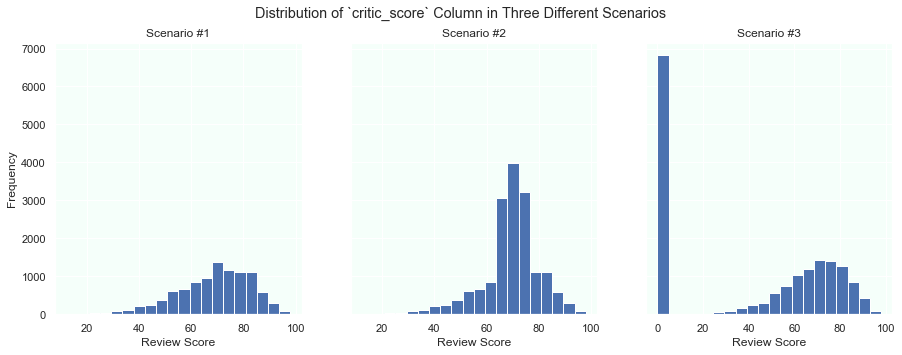

In [41]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5), sharey=True);
axs[0].hist(merged_critic['critic_score'], bins=20);
axs[0].set_title('Scenario #1');
axs[0].set_xlabel('Review Score');
axs[0].set_ylabel('Frequency');

axs[1].hist(merged_median, bins=20);
axs[1].set_title('Scenario #2');
axs[1].set_xlabel('Review Score');

axs[2].hist(merged_null, bins=20);
axs[2].set_title('Scenario #3');
axs[2].set_xlabel('Review Score');

plt.suptitle('Distribution of `critic_score` Column in Three Different Scenarios');


The histograms above shows data distribution for each scenarios we defined earlier. Scenario #1, where we take only data with valid numbers, gives a nice looking gaussian-like distribution albeit the smaller sample counts. Scenario #2, with missing values replaced with medians, will take the whole sample but resulting a spike around the median value. The underlying distribution of Scenario #2 is actually similar to that of Scenario #1. We can tell by comparing the statistical parameters between the two distributions. 

In [42]:
compare = pd.DataFrame(data=[[merged_critic.shape[0], merged_median.shape[0]],
                             [merged_critic.critic_score.mean(), merged_median.mean()],
                             [merged_critic.critic_score.median(), merged_median.median()],
                             [merged_critic.critic_score.std(), merged_median.std()]],
                       columns=['Scenario #1', 'Scenario #2'], 
                       index=['Count','Mean', 'Median', 'Standard Deviation'] )
pd.options.display.float_format = "{:,.2f}".format
compare

,Scenario #1,Scenario #2
Count,"9,897.00","16,715.00"
Mean,68.71,69.18
Median,70.00,69.64
Standard Deviation,13.97,10.92


Scenario #1 and Scenario #2 have similar mean and median and only differ in standard deviation due to different sample counts. At this point forward, we will use Scenario #1 to carry on with the analysis because it has a more meaningful distribution. Scenario #3 is not preferable because it results in a high peak in `0`, which is therefore useless for our analysis. 

#### Cleaning `User_Score` <a class="anchor" id="step_2_4"></a>

Continuing the data cleaning process, we will work with `merged_critic` dataset and evaluate values in  `user_score` column.

In [43]:
merged_critic.head()

,name,platform,genre,na_sales,eu_sales,jp_sales,other_sales,user_score,rating,year_of_release,critic_score
0,wii sports,wii,Sports,41.36,28.96,3.77,8.45,8,E,"2,006.00",76.00
2,mario kart wii,wii,Racing,15.68,12.76,3.79,3.29,8.3,E,"2,008.00",82.00
3,wii sports resort,wii,Sports,15.61,10.93,3.28,2.95,8,E,"2,009.00",80.00
5,tetris,gb,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,"1,989.00",89.73
6,new super mario bros.,ds,Platform,11.28,9.14,6.50,2.88,8.5,E,"2,006.00",89.00


In [44]:
merged_critic.query('user_score=="tbd"').head()

,name,platform,genre,na_sales,eu_sales,jp_sales,other_sales,user_score,rating,year_of_release,critic_score
301,namco museum: 50th anniversary,ps2,Misc,2.08,1.35,0.00,0.54,tbd,E10+,"2,005.00",61.00
645,udraw studio,wii,Misc,1.65,0.57,0.00,0.20,tbd,E,"2,010.00",71.00
657,frogger's adventures: temple of the frog,gba,Adventure,2.15,0.18,0.00,0.07,tbd,E,"2,001.00",73.00
821,the incredibles,gba,Action,1.15,0.77,0.04,0.10,tbd,E,"2,004.00",55.00
1047,tetris worlds,gba,Puzzle,1.25,0.39,0.00,0.06,tbd,E,"2,001.00",65.00


In [45]:
merged_critic.describe(include=['object'])

,name,platform,genre,user_score,rating
count,9897,9897,9897,8416,8368
unique,6454,22,12,93,7
top,need for speed: most wanted,ps2,Action,tbd,E
freq,9,1412,2145,1271,3005


The `user_score` column in `merged_critic` dataset has 1271 entries as `tbd` and 1500 missing values.

In [46]:
data_to_be_cleaned = merged_critic.user_score.isna().sum() + len(merged_critic.query('user_score == "tbd"'))
print('The number of rows with missing values in `user_score`: {}'.format(merged_critic.user_score.isna().sum()))
print('The number of rows with `tbd` in `user_score`: {},'.format(len(merged_critic.query('user_score == "tbd"'))))
print('Total rows to be cleaned: {}'.format(data_to_be_cleaned))
print('Ratio of the rows need to be cleaned: {:.3f}'.format(data_to_be_cleaned/len(merged_critic)))


The number of rows with missing values in `user_score`: 1481
The number of rows with `tbd` in `user_score`: 1271,
Total rows to be cleaned: 2752
Ratio of the rows need to be cleaned: 0.278


The `user_critic` has an `object` dataset that requires us to convert the data types. To this, we have to split the between the dataset that has `tbd` in `user_critic` and those that do not.

In [47]:
merged_critic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9897 entries, 0 to 16711
Data columns (total 11 columns):
name               9897 non-null object
platform           9897 non-null object
genre              9897 non-null object
na_sales           9897 non-null float64
eu_sales           9897 non-null float64
jp_sales           9897 non-null float64
other_sales        9897 non-null float64
user_score         8416 non-null object
rating             8368 non-null object
year_of_release    9897 non-null float64
critic_score       9897 non-null float64
dtypes: float64(6), object(5)
memory usage: 927.8+ KB


In [48]:
# Splitting data that have rows equal to `tbd` and those that do not.
merged_tbd = merged_critic.query('user_score == "tbd"')

merged_user = merged_critic.query('user_score != "tbd"')

In [49]:
merged_user.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8626 entries, 0 to 16711
Data columns (total 11 columns):
name               8626 non-null object
platform           8626 non-null object
genre              8626 non-null object
na_sales           8626 non-null float64
eu_sales           8626 non-null float64
jp_sales           8626 non-null float64
other_sales        8626 non-null float64
user_score         7145 non-null object
rating             7105 non-null object
year_of_release    8626 non-null float64
critic_score       8626 non-null float64
dtypes: float64(6), object(5)
memory usage: 808.7+ KB


Since `user_score` column in the splitted dataframe still in an `object` type, we have to convert them into `float`.

In [50]:
merged_user.loc[:,'user_score'] = merged_user['user_score'].astype(float)

/Users/w.persadha/opt/anaconda3/envs/practicum/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


Checking the type after conversion,

In [51]:
merged_user.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8626 entries, 0 to 16711
Data columns (total 11 columns):
name               8626 non-null object
platform           8626 non-null object
genre              8626 non-null object
na_sales           8626 non-null float64
eu_sales           8626 non-null float64
jp_sales           8626 non-null float64
other_sales        8626 non-null float64
user_score         7145 non-null float64
rating             7105 non-null object
year_of_release    8626 non-null float64
critic_score       8626 non-null float64
dtypes: float64(7), object(4)
memory usage: 808.7+ KB


Now we can find medians of `critic_score` based on `name` and `platform` to attempt filling in the `tbd` rows. To replace the `tbd`, we can first group `merged_critic` by `name` and `platform` and see if it can help us with the cleaning.

In [52]:
# Creating new dataframe for grouped dataset
user_name_platform = merged_user.groupby(['name', 'platform'])['user_score'].median()
user_name_platform

name                        platform
 tales of xillia 2          ps3        7.90
.hack//infection part 1     ps2        8.50
.hack//mutation part 2      ps2        8.90
.hack//outbreak part 3      ps2        8.70
007 racing                  ps         4.60
                                       ... 
zubo                        ds         7.60
zumba fitness               x360       5.50
zumba fitness core          x360       6.70
zumba fitness rush          x360       6.20
zumba fitness: world party  xone       6.20
Name: user_score, Length: 8622, dtype: float64

We see that the grouped dataset `user_name_platform` has missing values. We will take only the rows that have valid values,

In [53]:
user_name_platform = user_name_platform[~user_name_platform.isna()].reset_index()

In [54]:
display(user_name_platform.head())
print('The length of `user_name_platform`: {}'.format(len(user_name_platform)))

,name,platform,user_score
0,tales of xillia 2,ps3,7.90
1,.hack//infection part 1,ps2,8.50
2,.hack//mutation part 2,ps2,8.90
3,.hack//outbreak part 3,ps2,8.70
4,007 racing,ps,4.60


The length of `user_name_platform`: 7141


Performing the merge between the dataset that has `tbd` and the grouped dataset,

In [55]:
merged_user2 = reduce(lambda left, right: pd.merge(left, right, on=['name', 'platform'], how='left'), 
                      [merged_tbd, user_name_platform])

In [56]:
merged_user2.head()

,name,platform,genre,na_sales,eu_sales,jp_sales,other_sales,user_score_x,rating,year_of_release,critic_score,user_score_y
0,namco museum: 50th anniversary,ps2,Misc,2.08,1.35,0.00,0.54,tbd,E10+,"2,005.00",61.00,nan
1,udraw studio,wii,Misc,1.65,0.57,0.00,0.20,tbd,E,"2,010.00",71.00,nan
2,frogger's adventures: temple of the frog,gba,Adventure,2.15,0.18,0.00,0.07,tbd,E,"2,001.00",73.00,nan
3,the incredibles,gba,Action,1.15,0.77,0.04,0.10,tbd,E,"2,004.00",55.00,nan
4,tetris worlds,gba,Puzzle,1.25,0.39,0.00,0.06,tbd,E,"2,001.00",65.00,nan


In [57]:
merged_user2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1271 entries, 0 to 1270
Data columns (total 12 columns):
name               1271 non-null object
platform           1271 non-null object
genre              1271 non-null object
na_sales           1271 non-null float64
eu_sales           1271 non-null float64
jp_sales           1271 non-null float64
other_sales        1271 non-null float64
user_score_x       1271 non-null object
rating             1263 non-null object
year_of_release    1271 non-null float64
critic_score       1271 non-null float64
user_score_y       0 non-null float64
dtypes: float64(7), object(5)
memory usage: 129.1+ KB


We can use the same strategies to deal with the missing values as we did with the `critic_score` column by setting up three scenarios. The first scenario is where we remove the rows with `tbd` and continue working with the subset of the dataframe. The second scenario is filling the `NaN` with medians of `genre` column. The last one is simply replacing them with `0`.

For Scenario #1 we already have `merged_user` which contain rows from `merged_critic` after removing the `tbd` in `user_score` column. Before continuing, we have to check for the remaining `NaN` values in this dataset.

In [58]:
merged_user.head()

,name,platform,genre,na_sales,eu_sales,jp_sales,other_sales,user_score,rating,year_of_release,critic_score
0,wii sports,wii,Sports,41.36,28.96,3.77,8.45,8.00,E,"2,006.00",76.00
2,mario kart wii,wii,Racing,15.68,12.76,3.79,3.29,8.30,E,"2,008.00",82.00
3,wii sports resort,wii,Sports,15.61,10.93,3.28,2.95,8.00,E,"2,009.00",80.00
5,tetris,gb,Puzzle,23.20,2.26,4.22,0.58,nan,NaN,"1,989.00",89.73
6,new super mario bros.,ds,Platform,11.28,9.14,6.50,2.88,8.50,E,"2,006.00",89.00


In [59]:
merged_user = merged_user[~merged_user['user_score'].isna()]

For Scenario #2 and Scenario #3 we need to change the `tbd` into `NaN`,

In [60]:
merged_user_scene2and3 = merged_critic.copy()
merged_user_scene2and3.loc[merged_user_scene2and3['user_score'] == "tbd", 'user_score'] = np.nan

# Convert entries into `float` data type
merged_user_scene2and3['user_score'] = merged_user_scene2and3['user_score'].astype('float')

Performing replacement with the median of each genre for Scenario #2,

In [61]:
merged_user_median = merged_user_scene2and3.groupby(['genre'])['user_score'].apply(lambda x: x.fillna(x.median()))
print('Number of missing values after replacemnt: ',merged_user_median.isna().sum())

Number of missing values after replacemnt:  0


Replacing missing values with `0` for Scenario #3,

In [62]:
# Scenario #3: Replacing missing values with zeros.
merged_user_null = merged_user_scene2and3['user_score'].fillna(0)
print('Number of missing values after replacement: ',merged_user_null.isna().sum())

Number of missing values after replacement:  0


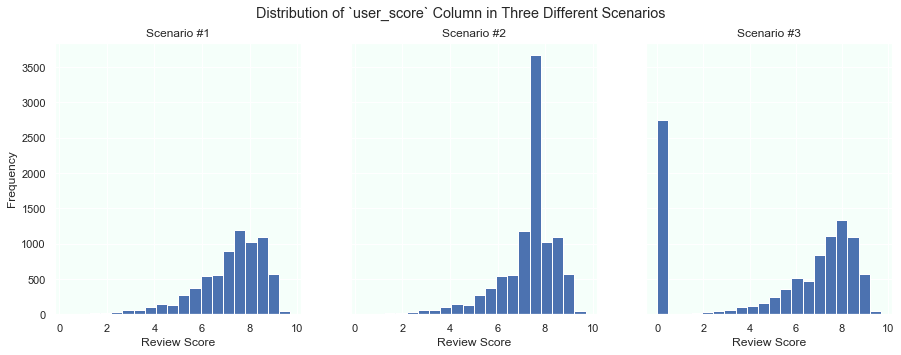

In [63]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5), sharey=True);
axs[0].hist(merged_user['user_score'], bins=20);
axs[0].set_title('Scenario #1');
axs[0].set_xlabel('Review Score');
axs[0].set_ylabel('Frequency');

axs[1].hist(merged_user_median, bins=20);
axs[1].set_title('Scenario #2');
axs[1].set_xlabel('Review Score');

axs[2].hist(merged_user_null, bins=20);
axs[2].set_title('Scenario #3');
axs[2].set_xlabel('Review Score');

plt.suptitle('Distribution of `user_score` Column in Three Different Scenarios');

As in `critic_score` column, the `user_score` gives similar distributions of three scenarios. The first scenario shows a gaussian-like distribution. Scenario #2 gives a gaussian-like distribution with a high peak at the median value. Scenario #3 has an obvious spike at zero value.

We will use Scenario #1 with the `merge_user` dataset by taking the same assumption as before, which is the distribution of Scenario #1 and #2 are similar. We can confirm this by the mean and median values of both datasets. 

In [64]:
compare = pd.DataFrame(data=[[merged_user.shape[0], merged_user_median.shape[0]],
                             [merged_user.user_score.mean(), merged_user_median.mean()],
                             [merged_user.user_score.median(), merged_user_median.median()],
                             [merged_user.user_score.std(), merged_user_median.std()]],
                       columns=['Scenario #1', 'Scenario #2'], 
                       index=['Count','Mean', 'Median', 'Standard Deviation'] )
pd.options.display.float_format = "{:,.2f}".format
compare

,Scenario #1,Scenario #2
Count,"7,145.00","9,897.00"
Mean,7.18,7.27
Median,7.50,7.50
Standard Deviation,1.45,1.24


#### Cleaning `rating` Column <a class="anchor" id="step_2_5"></a>

The last column to clean up is `rating`. For this task we are going to take the mode of each genre then pass them to fill in the missing values.

In [65]:
merged_user.isna().sum()

name                0
platform            0
genre               0
na_sales            0
eu_sales            0
jp_sales            0
other_sales         0
user_score          0
rating             74
year_of_release     0
critic_score        0
dtype: int64

In [66]:
# Creating a dictionary that maps the genre and hte most common rating for a particular genre
rating_dict = {}
for k, v in merged.groupby('genre')['rating'].agg(pd.Series.mode).items():
    rating_dict[k] = v

rating_dict

{'Action': 'T',
 'Adventure': 'E',
 'Fighting': 'T',
 'Misc': 'E',
 'Platform': 'E',
 'Puzzle': 'E',
 'Racing': 'E',
 'Role-Playing': 'T',
 'Shooter': 'M',
 'Simulation': 'E',
 'Sports': 'E',
 'Strategy': 'T'}

In [67]:
# Performing replacement
merged_user['rating'] = merged_user.apply(lambda row: rating_dict[row['genre']] if row['rating'] is np.nan else row['rating'], axis=1)

Checking the number of missing values after replacement,

In [68]:
merged_user.isna().sum()

name               0
platform           0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
user_score         0
rating             0
year_of_release    0
critic_score       0
dtype: int64

#### Calculating The Total Sales <a class="anchor" id="step_2_6"></a>

The last task of this step is to calculate the total sales over all region. We can calculate the total sales as follows:

In [69]:
merged_user['total_sales'] = merged_user[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

In [70]:
merged_user.head()

,name,platform,genre,na_sales,eu_sales,jp_sales,other_sales,user_score,rating,year_of_release,critic_score,total_sales
0,wii sports,wii,Sports,41.36,28.96,3.77,8.45,8.00,E,"2,006.00",76.00,82.54
2,mario kart wii,wii,Racing,15.68,12.76,3.79,3.29,8.30,E,"2,008.00",82.00,35.52
3,wii sports resort,wii,Sports,15.61,10.93,3.28,2.95,8.00,E,"2,009.00",80.00,32.77
6,new super mario bros.,ds,Platform,11.28,9.14,6.50,2.88,8.50,E,"2,006.00",89.00,29.80
7,wii play,wii,Misc,13.96,9.18,2.93,2.84,6.60,E,"2,006.00",58.00,28.91


We are done with the pre-processing step. One last additional step is to rename the dataset and converting `year_of_release` data type into `int64`.

In [71]:
data = merged_user.copy()

In [72]:
data['year_of_release'] = data['year_of_release'].astype('int64')
data.head()

,name,platform,genre,na_sales,eu_sales,jp_sales,other_sales,user_score,rating,year_of_release,critic_score,total_sales
0,wii sports,wii,Sports,41.36,28.96,3.77,8.45,8.00,E,2006,76.00,82.54
2,mario kart wii,wii,Racing,15.68,12.76,3.79,3.29,8.30,E,2008,82.00,35.52
3,wii sports resort,wii,Sports,15.61,10.93,3.28,2.95,8.00,E,2009,80.00,32.77
6,new super mario bros.,ds,Platform,11.28,9.14,6.50,2.88,8.50,E,2006,89.00,29.80
7,wii play,wii,Misc,13.96,9.18,2.93,2.84,6.60,E,2006,58.00,28.91


In [73]:
data.tail()

,name,platform,genre,na_sales,eu_sales,jp_sales,other_sales,user_score,rating,year_of_release,critic_score,total_sales
16681,worms 2,pc,Strategy,0.00,0.01,0.00,0.00,8.10,K-A,1997,86.00,0.01
16692,metal gear solid v: ground zeroes,pc,Action,0.00,0.01,0.00,0.00,7.60,M,2014,80.00,0.01
16696,breach,pc,Shooter,0.01,0.00,0.00,0.00,5.80,T,2011,61.00,0.01
16702,storm: frontline nation,pc,Strategy,0.00,0.01,0.00,0.00,7.20,E10+,2011,60.00,0.01
16705,15 days,pc,Adventure,0.00,0.01,0.00,0.00,5.80,E,2009,63.00,0.01


In [74]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7145 entries, 0 to 16705
Data columns (total 12 columns):
name               7145 non-null object
platform           7145 non-null object
genre              7145 non-null object
na_sales           7145 non-null float64
eu_sales           7145 non-null float64
jp_sales           7145 non-null float64
other_sales        7145 non-null float64
user_score         7145 non-null float64
rating             7145 non-null object
year_of_release    7145 non-null int64
critic_score       7145 non-null float64
total_sales        7145 non-null float64
dtypes: float64(7), int64(1), object(4)
memory usage: 725.7+ KB


In [75]:
data.describe()

,na_sales,eu_sales,jp_sales,other_sales,user_score,year_of_release,critic_score,total_sales
count,"7,145.00","7,145.00","7,145.00","7,145.00","7,145.00","7,145.00","7,145.00","7,145.00"
mean,0.39,0.23,0.06,0.08,7.18,"2,007.47",70.11,0.76
std,0.95,0.67,0.28,0.26,1.45,4.24,13.94,1.93
min,0.00,0.00,0.00,0.00,0.30,"1,985.00",13.00,0.01
25%,0.06,0.02,0.00,0.01,6.50,"2,004.00",62.00,0.11
50%,0.15,0.06,0.00,0.02,7.50,"2,007.00",72.00,0.29
75%,0.38,0.20,0.01,0.07,8.20,"2,011.00",80.00,0.74
max,41.36,28.96,6.50,10.57,9.70,"2,016.00",98.00,82.54


### Conclusion <a class="anchor" id="conclusion_2"></a>

We have replaced missing values in various columns of our dataset. Using an external dataset, we managed to fill in almost half of the `year_of_release` column and 15% of the `critic_score`. With further pre-processing, we managed to replace all missing values in `year_of_release`. For the remaining missing values in `critic_score`, we set up three scenarios and compared the distributions. We concluded that removing the missing values from the dataset, or rather, selecting a subset of the dataset that has only valid values, is the better choice over the other two scenarios.

The same set up also done for the missing values in `user_score`. By comparing the distribution s between the three scenarios, we are sure that taking a subset of the valid data is the way to analyze. We ended up with a dataset with 7145 samples. Next, the missing values in `rating` are replaced by the mode of each genre. Finally, we calculated the total sales from all regions that will be used in the analysis phase.


### Step 3. Analyze the data <a class="anchor" id="step_3"></a>

We are now in the analysis part of the project, where we are going to find meaningful business-value from the dataset.

#### Question 3.1: Look at how many games were released in different years. Is the data for every period significant? <a class="anchor" id="step_3_1"></a>

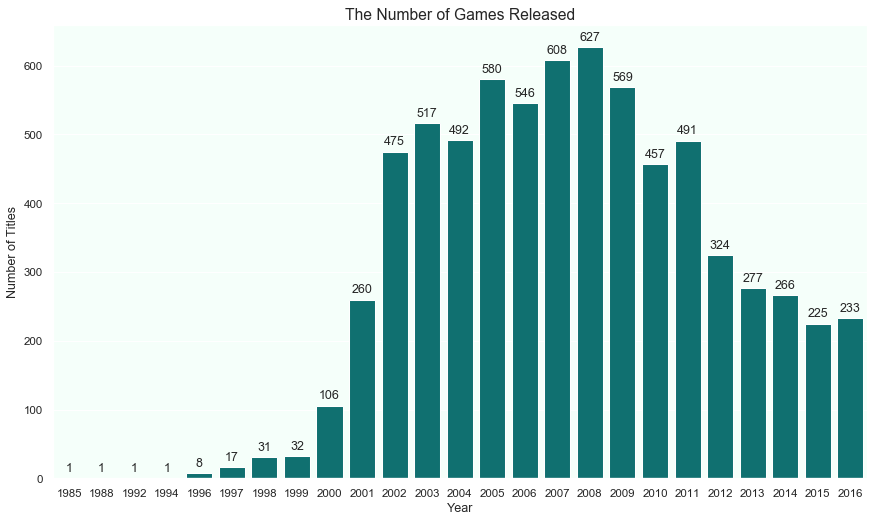

In [76]:
# Grouping data based on year
game_year = data.groupby('year_of_release').count().reset_index()

# Creating bar plot
fig, ax = plt.subplots(figsize=(14,8), dpi=75)
sns.barplot(data=game_year, x='year_of_release', y='name', color='teal',)

# Creating label on top of each bar
for row in data.groupby('year_of_release').count().reset_index().itertuples():
    ax.text(row.Index, 
            row.name+5, 
            s=round(row.name, 2), 
            horizontalalignment='center',
            verticalalignment='bottom')
ax.set_xlabel('Year')
ax.set_ylabel('Number of Titles')
plt.title('The Number of Games Released', fontdict={'size':15});

The number of games released was quite low until the end of the 90s. Games in this period were dominated by those released for PlayStation. Then starting in 2000, the number of releases were significantly increased. New platforms such as PlayStation 2, Xbox, Game Boy Advance, Nintendo GameCube started to appear in the market. A couple of years later, Nintendo Wii and Playstation Portable joined the market, which helps boost the number of titles. This trend continues until it reached the peak in 2008, with 627 titles released in the year. 

In [77]:
# The number of games released on every platform throughout the years
data.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='count', fill_value=0)

platform,3ds,dc,ds,gba,gc,pc,ps,ps2,ps3,ps4,psp,psv,wii,wiiu,x360,xb,xone
year_of_release,,,,,,,,,,,,,,,,,
1985,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1988,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1992,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1994,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1996,0,0,0,0,0,2,6,0,0,0,0,0,0,0,0,0,0
1997,0,0,0,0,0,4,13,0,0,0,0,0,0,0,0,0,0
1998,0,0,0,0,0,8,23,0,0,0,0,0,0,0,0,0,0
1999,0,3,0,0,0,3,26,0,0,0,0,0,0,0,0,0,0
2000,0,7,0,0,0,5,53,40,0,0,0,0,0,0,0,1,0


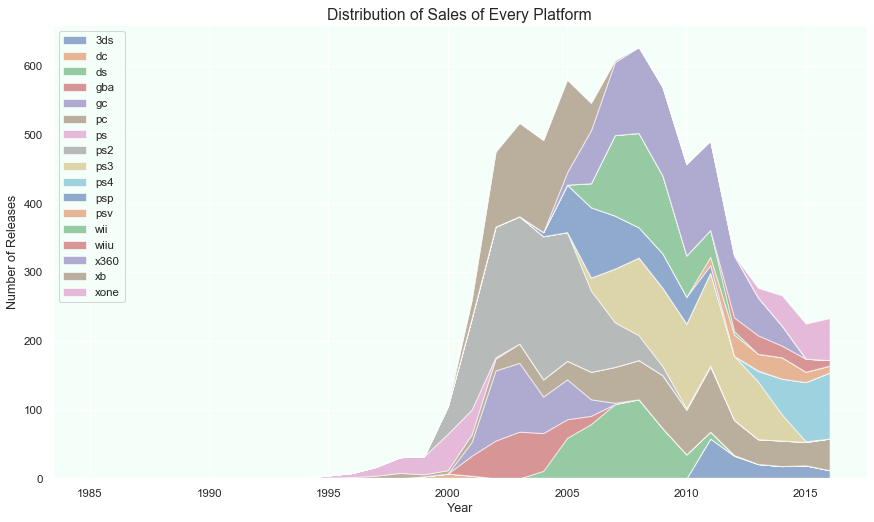

In [78]:
# Group PlayStation 2 data based on year 
each_platform = data.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='count', fill_value=0)

# Setting up x anbd y values as list
x = each_platform.index.tolist()
y = [each_platform[col].values.tolist() for col in each_platform.columns]
labels = [str(col) for col in each_platform.columns]

# Creating a stacked area plot
plt.figure(figsize=(14,8), dpi=75)
plt.stackplot(x, y,
              labels=labels,
              alpha=0.6 )
plt.legend(loc='upper left')
plt.xlabel("Year")
plt.ylabel("Number of Releases")
plt.title("Distribution of Sales of Every Platform", fontdict={'size':15});

The above figure shows the number of the title released for every platform and their contribution to the total number of releases every year.

#### Question 3.2: Look at how sales varied from platform to platform. Choose the platforms with the greatest total sales and build a distribution based on data for each year <a class="anchor" id="step_3_2"></a>

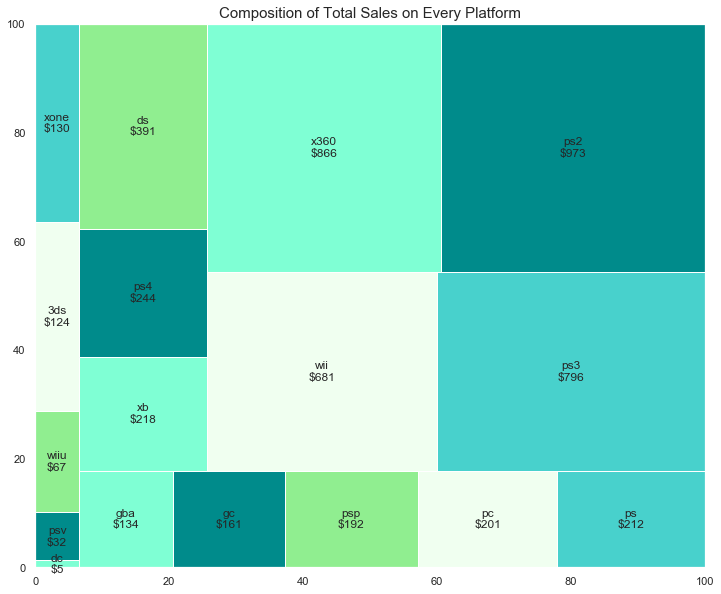

In [79]:
# Grouping the data by platform, then sort them based on the total sales
data_tree = data[['platform', 'total_sales']].groupby(['platform']).sum().sort_values(by='total_sales').reset_index()

# Taking only the rows where the sales is greater than zero
data_tree = data_tree[data_tree['total_sales']!=0]

# Making a list to determine the size of leaf for Squarify tree plot
sizes=data_tree.total_sales.values.tolist()

# Creating labels for the tree plot
labels = data_tree.apply(lambda x: str(x[0])+'\n'+'\$'+str(round(x[1])), axis=1)

# Plotting the tree diagram
plt.figure(figsize=(12,10))
squarify.plot(sizes=sizes, label=labels, color=('#7fffd4', '#008b8b', '#90ee90', '#f0fff0', '#48d1cc'));
plt.title('Composition of Total Sales on Every Platform', fontdict={'size':15});

Among the platforms, PlayStation 2 generated the highest revenue with US$973 million. The top three games that gave PlayStation 2 the highest revenue were 'Grand Theft Auto: San Andreas' (released in 2004), 'Grand Theft Auto: Vice City' (2002), and Gran Turismo 3: A-Spec' (2001).

In [80]:
data[data['platform']=='ps2'].sort_values(by='total_sales', ascending=False)[['name', 
                                                                              'platform', 
                                                                              'year_of_release',
                                                                              'total_sales']].head()

,name,platform,year_of_release,total_sales
17,grand theft auto: san andreas,ps2,2004,20.81
24,grand theft auto: vice city,ps2,2002,16.15
28,gran turismo 3: a-spec,ps2,2001,14.97
38,grand theft auto iii,ps2,2001,13.10
48,gran turismo 4,ps2,2004,11.65


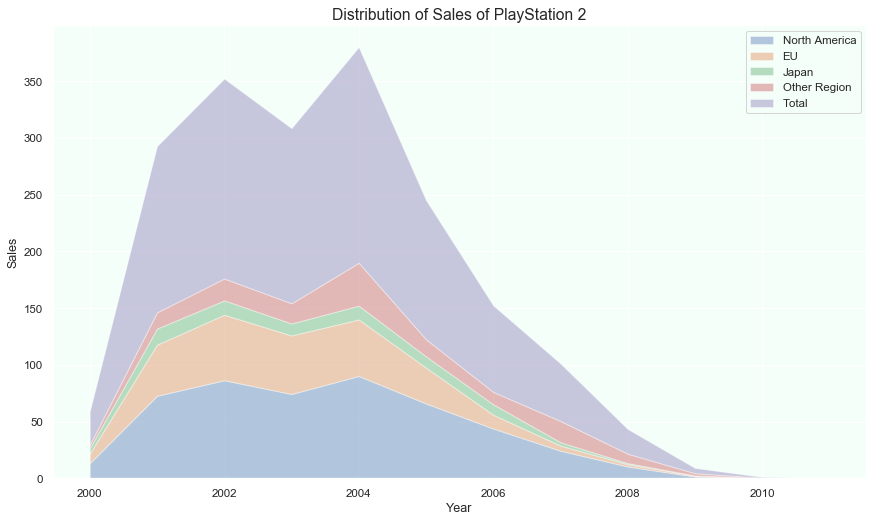

In [81]:
# Group PlayStation 2 data based on year 
ps2 = data[data['platform']=='ps2'].groupby('year_of_release').sum().reset_index()

# Setting up x anbd y values as list
x = ps2.year_of_release.values.tolist()
y = [ps2.na_sales.values.tolist(),
     ps2.eu_sales.values.tolist(),
     ps2.jp_sales.values.tolist(),
     ps2.other_sales.values.tolist(),
     ps2.total_sales.values.tolist()]

# Creating a stacked area plot
plt.figure(figsize=(14,8), dpi=75)
plt.stackplot(x, y,
              labels=['North America','EU','Japan', 'Other Region', 'Total'],
              alpha=0.4 )
plt.legend(loc='upper right')
plt.xlabel("Year")
plt.ylabel("Sales")
plt.title("Distribution of Sales of PlayStation 2", fontdict={'size':15});

 

We can see the distribution of sales of PlayStation 2 from different regions. The revenue peaked around 2002-2004 then slowly decreased until it was discontinued in 2013.

**Find platforms that used to be popular but now have zero sales**

In [82]:
# Creating a pivot table to see the total sales of each platform every year
year_sum = data.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum', fill_value=0)

# Shifting the data to see how sales changes between two consecutive year
sales_growth = year_sum-year_sum.shift(+1).fillna(0)
sales_growth

platform,3ds,dc,ds,gba,gc,pc,ps,ps2,ps3,ps4,psp,psv,wii,wiiu,x360,xb,xone
year_of_release,,,,,,,,,,,,,,,,,
1985,0.00,0.00,0.00,0.00,0.00,0.04,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1988,0.00,0.00,0.00,0.00,0.00,-0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1992,0.00,0.00,0.00,0.00,0.00,-0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1994,0.00,0.00,0.00,0.00,0.00,-0.02,1.26,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1996,0.00,0.00,0.00,0.00,0.00,2.62,16.47,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1997,0.00,0.00,0.00,0.00,0.00,3.81,14.20,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1998,0.00,0.00,0.00,0.00,0.00,-3.17,13.24,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1999,0.00,2.04,0.00,0.00,0.00,-3.09,4.86,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2000,0.00,-0.06,0.00,0.00,0.00,3.01,-3.85,29.50,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.99,0.00


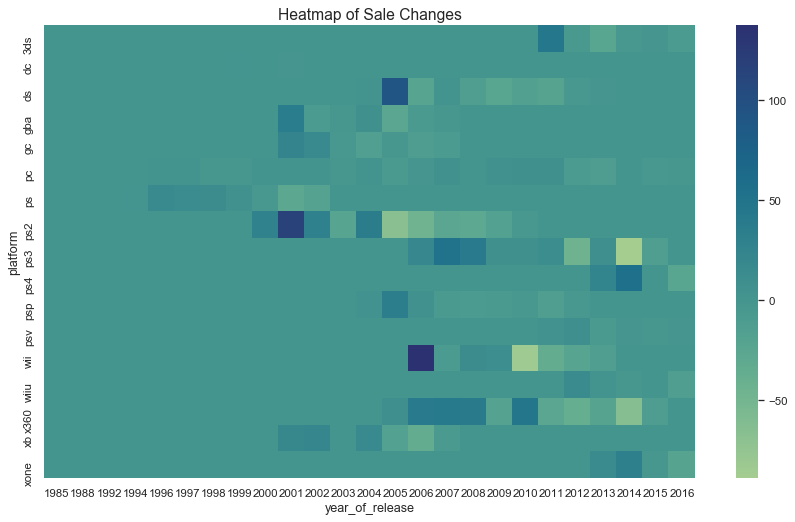

In [83]:
# Plotting a heatmap
plt.figure(figsize=(14,8), dpi= 75)
sns.heatmap(sales_growth.T, cmap="crest")
plt.title('Heatmap of Sale Changes', fontdict={'size':15});

The heatmap shows how sales change every year. The dark squares indicate an increased sale between two consecutive years, and the light squares show a loss of sales. From the plot, we can readily see that there were three platforms, PlayStation 2, Nintendo Wii, and Nintendo DS, that once were very successful when they were first introduced and then had their sales gradually declined to zero.  

**How long does it generally take for new platforms to appear and old ones to fade?**

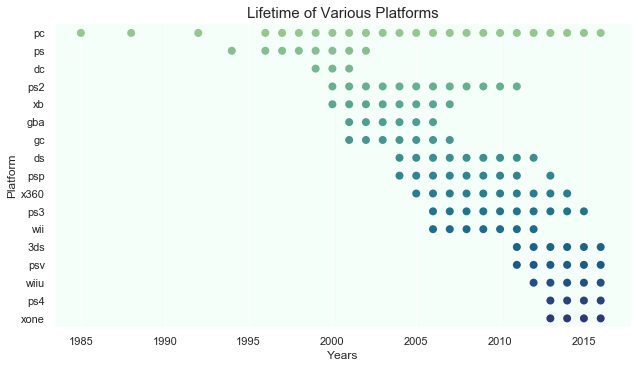

In [84]:
# Group the data based on year and platform
data_year = data.groupby(['year_of_release','platform']).count()
data_year = data_year.reset_index()

# Make the PairGrid
g = sns.PairGrid(data_year,
                 x_vars='year_of_release', y_vars='platform',
                 height=5, aspect=1.8)

# Draw a dot plot using the stripplot function
g.map(sns.stripplot, size=8, orient="h", jitter=False,
      palette="crest", linewidth=0, facecolor="mintcream")

# Use the same x axis limits on all columns and add better labels
g.set(xlabel="Years", ylabel="Platform")

plt.title('Lifetime of Various Platforms', fontdict={'size':15});

In [85]:
# Finding the start year of every platform and how long they stayed in the market
lifetime = data.groupby('platform').agg({'year_of_release':['min', 'nunique']})
lifetime.columns = ['Start Year', 'Count']
lifetime

,Start Year,Count
platform,,
3ds,2011,6
dc,1999,3
ds,2004,9
gba,2001,6
gc,2001,7
pc,1985,24
ps,1994,8
ps2,2000,12
ps3,2006,10


In [86]:
print('The average year of a platform is {:.2f} years.'.format(lifetime.Count.mean()))

The average year of a platform is 8.12 years.


Typically it takes eight years for a platform to stay in the market. The early 2000s is the era where many new platforms appeared. Among them, PlayStation 2 survived the longest in the market for twelve years. 

#### Question 3.3: Determine what period you should take data for. <a class="anchor" id="step_3_3"></a>

We have seen that there was a significant increase in games released in the early '00s. Consequently, this made this period a good case for our analysis. However, there are platforms that have been discontinued before 2016. One example is PlayStation 2, the most dominating platform in global sales, which was officially discontinued in 2013. Likewise, Xbox 360 was discontinued in 2014. However, we still need to take into consideration that the consoles and games are still available in the market and might be sold at a discounted price. Therefore, for our analysis, we are going to take the data from 2008 onward, where the global sales start to decline. This is also to give a more relevant picture of how the current video games market is today.  

In [87]:
data_2008 = data[data['year_of_release'] > 2008]
data_2008.head()

,name,platform,genre,na_sales,eu_sales,jp_sales,other_sales,user_score,rating,year_of_release,critic_score,total_sales
3,wii sports resort,wii,Sports,15.61,10.93,3.28,2.95,8.00,E,2009,80.00,32.77
8,new super mario bros. wii,wii,Platform,14.44,6.94,4.70,2.24,8.40,E,2009,87.00,28.32
14,kinect adventures!,x360,Misc,15.00,4.89,0.24,1.69,6.30,E,2010,61.00,21.82
15,wii fit plus,wii,Sports,9.01,8.49,2.53,1.77,7.40,E,2009,80.00,21.80
16,grand theft auto v,ps3,Action,7.02,9.09,0.98,3.96,8.20,M,2013,97.00,21.05


#### Questioin 3.4: Which platforms are leading in sales? Which ones are growing or shrinking? Select several potentially profitable platforms. <a class="anchor" id="step_3_4"></a>

In [88]:
# Group the data based on the platform, then sort by total_sales
grouped_data = data_2008[['platform', 'total_sales']].groupby('platform').sum().sort_values(by='total_sales').reset_index()

# Normalize the sales value using the z-score so that we have some sort of benchmark value
grouped_data['sales_z'] = (grouped_data['total_sales']-grouped_data['total_sales'].mean())/grouped_data['total_sales'].std()

# Assign different colors to sales that are above and below the benchmark
grouped_data['color'] = grouped_data['sales_z'].apply(lambda x: 'firebrick' if x < 0 else 'forestgreen')

grouped_data.head()

,platform,total_sales,sales_z,color
0,ps2,5.41,-0.92,firebrick
1,psv,31.66,-0.79,firebrick
2,psp,39.90,-0.75,firebrick
3,wiiu,66.61,-0.61,firebrick
4,ds,72.30,-0.59,firebrick


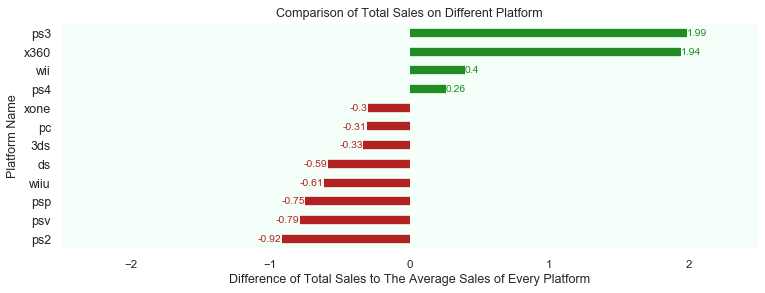

In [89]:
# Creating barplot
plt.figure(figsize=(12,4), dpi= 75)
plt.hlines(y=grouped_data.platform, xmin=0, xmax=grouped_data.sales_z, linewidth=8, color=grouped_data.color)
for x, y, tex in zip(grouped_data.sales_z, grouped_data.platform, grouped_data.sales_z):
    t = plt.text(x, y, round(tex, 2), horizontalalignment='right' if x < 0 else 'left', 
                 verticalalignment='center', fontdict={'color':'firebrick' if x < 0 else 'forestgreen', 'size':10})

# Decorations    
plt.yticks(grouped_data.index, grouped_data.platform, fontsize=12)
plt.title('Comparison of Total Sales on Different Platform', fontdict={'size':12})
plt.grid(linestyle='--', alpha=0.5)
plt.xlim(-2.5, 2.5);
plt.xlabel('Difference of Total Sales to The Average Sales of Every Platform')
plt.ylabel('Platform Name');


The chart shows that currently, PlayStation 3 and Xbox 360 have the highest sales compared to other platforms, with more than 1.5 scores above the average. Nintendo Wii comes after Xbox 360. PlayStation 4 is the only platform that is still active and having positive sales, which suggests us where to put more of our attention into.

#### Question 3.5: Build a box plot for the global sales of all games, broken down by platform. Are the differences in sales significant? <a class="anchor" id="step_3_5"></a>

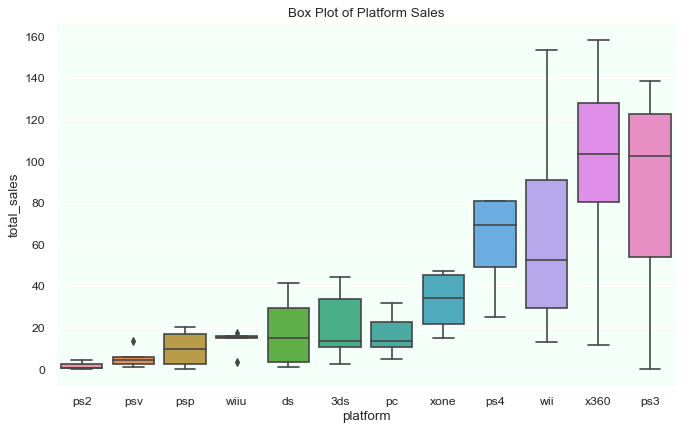

In [90]:
data_box = data_2008.groupby(['platform', 'year_of_release'])['total_sales'].sum().reset_index()

ordered = data_box.groupby(['platform'])['total_sales'].sum().sort_values().reset_index()['platform']

plt.figure(figsize=(10,6), dpi= 80)
sns.boxplot(x='platform', y='total_sales', data=data_box, order=ordered);
plt.title('Box Plot of Platform Sales');


The boxplot is pretty much agreed with the sales growth plot we made earlier. PlayStation 3, Xbox 360, Nintendo Wii, and PlayStation 4 have higher means and wider dispersions compared to others. This shows that the wide dispersions supported by the high median help these four platforms to gain positive sales.

#### Question 3.6: Take a look at how user and professional reviews affect sales for one popular platform (you choose). Build a scatter plot and calculate the correlation between reviews and sales. Draw conclusions. <a class="anchor" id="step_3_6"></a>

For this analysis we choose to analyze PlayStation 4 because among the other platforms that have positive sales, it is the only that currently active hence more potential to grow in the future.

In [91]:
data_score = data_2008.query('platform=="ps4"')[['name','total_sales','user_score', 'critic_score']]
data_score.head()

,name,total_sales,user_score,critic_score
42,grand theft auto v,12.62,8.30,97.00
77,fifa 16,8.58,4.30,82.00
92,call of duty: advanced warfare,7.66,5.70,83.00
94,fifa 17,7.60,5.00,85.00
105,fallout 4,7.17,6.50,87.00


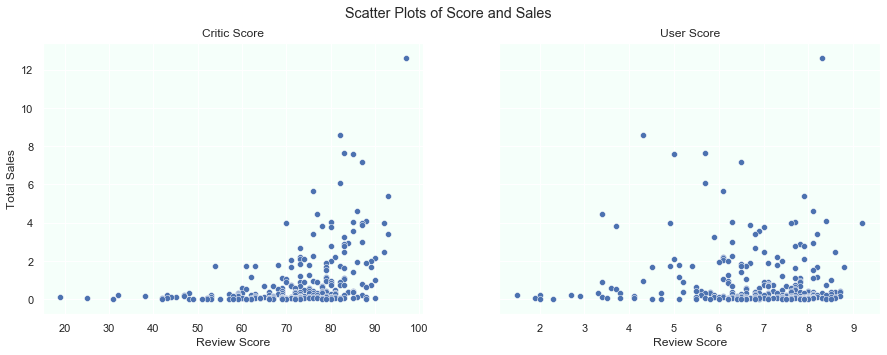

In [92]:
# Plotting the scatter plot between score and sales
fig, axs = plt.subplots(1, 2, figsize=(15, 5), sharey=True);
sns.scatterplot(x='critic_score', y='total_sales', data=data_score, ax=axs[0])
axs[0].set_title('Critic Score');
axs[0].set_xlabel('Review Score');
axs[0].set_ylabel('Total Sales');

sns.scatterplot(x='user_score', y='total_sales', data=data_score, ax=axs[1])
axs[1].set_title('User Score');
axs[1].set_xlabel('Review Score');

plt.suptitle('Scatter Plots of Score and Sales');

We can see in Critic Score plot that there are some correlation between the critic's review and total sales. The games that have good reviews relatively have good sales number. On the contrary, the sales in User Score plot are more scattered regardless os user review.

Text(0.5, 1, "Correlation Between Reviewer's Scores to Total Sales")

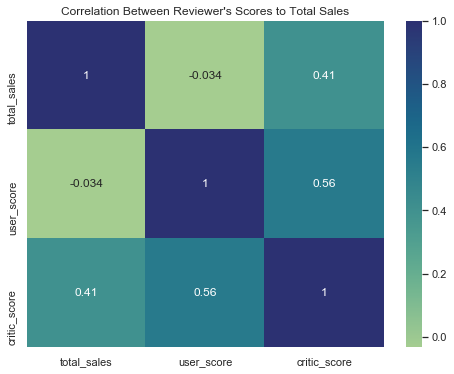

In [93]:
# Creating a correlation heatmap 
plt.figure(figsize=(8,6))
sns.heatmap(data_score.corr(), cmap="crest", annot=True);
plt.title("Correlation Between Reviewer's Scores to Total Sales")

This is more evident when we evaluate the correlation heatmap between the variables. The total sales and critic reviews has 0.41 score indicating a rather moderate correlation. On the other hand total sales and user score only has -0.034 which means very weak to no correlation at all. This result indicates that PlayStation 4's customers put more trust and based their decision on critic's review rather that user's opinion.

#### Question 3.7: Keeping your conclusions in mind, compare the sales of the same games on other platforms.<a class="anchor" id="step_3_7"></a>

First, we list out games that are available on the platform of our choosing (PlayStation 4),

In [94]:
data_2008.query('platform == "ps4"').head()

,name,platform,genre,na_sales,eu_sales,jp_sales,other_sales,user_score,rating,year_of_release,critic_score,total_sales
42,grand theft auto v,ps4,Action,3.96,6.31,0.38,1.97,8.30,M,2014,97.00,12.62
77,fifa 16,ps4,Sports,1.12,6.12,0.06,1.28,4.30,E,2015,82.00,8.58
92,call of duty: advanced warfare,ps4,Shooter,2.81,3.48,0.14,1.23,5.70,M,2014,83.00,7.66
94,fifa 17,ps4,Sports,0.66,5.75,0.08,1.11,5.00,E,2016,85.00,7.60
105,fallout 4,ps4,Role-Playing,2.53,3.27,0.24,1.13,6.50,M,2015,87.00,7.17


We choose to evaluate "Grand Theft Auto 5" since it has the highest sales.

In [95]:
gta5 = data_2008.query('name=="grand theft auto v"').groupby('platform').sum().reset_index()
gta5['sales_z'] = (gta5['total_sales'] - gta5['total_sales'].mean())/gta5['total_sales'].std()
gta5['color'] = gta5['sales_z'].apply(lambda x: 'firebrick' if x < 0 else 'forestgreen')
gta5.head()

,platform,na_sales,eu_sales,jp_sales,other_sales,user_score,year_of_release,critic_score,total_sales,sales_z,color
0,pc,0.39,0.69,0.00,0.09,7.90,2015,96.00,1.17,-1.26,firebrick
1,ps3,7.02,9.09,0.98,3.96,8.20,2013,97.00,21.05,1.21,forestgreen
2,ps4,3.96,6.31,0.38,1.97,8.30,2014,97.00,12.62,0.16,forestgreen
3,x360,9.66,5.14,0.06,1.41,8.10,2013,97.00,16.27,0.62,forestgreen
4,xone,2.81,2.19,0.00,0.47,7.90,2014,97.00,5.47,-0.73,firebrick


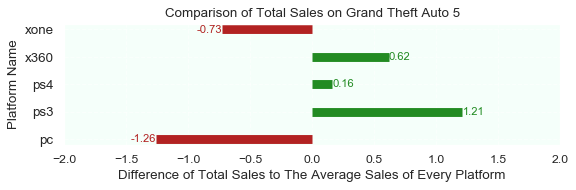

In [96]:
# Creating barplot
plt.figure(figsize=(8,2), dpi= 80)
plt.hlines(y=gta5.reset_index().platform, xmin=0, xmax=gta5.sales_z, linewidth=8, color=gta5.color)
for x, y, tex in zip(gta5.sales_z, gta5.platform, gta5.sales_z):
    t = plt.text(x, y, round(tex, 2), horizontalalignment='right' if x < 0 else 'left', 
                 verticalalignment='center', fontdict={'color':'firebrick' if x < 0 else 'forestgreen', 'size':10})

# Decorations    
plt.yticks(gta5.index, gta5.platform, fontsize=12)
plt.title('Comparison of Total Sales on Grand Theft Auto 5', fontdict={'size':12})
plt.grid(linestyle='--', alpha=0.5)
plt.xlim(-2, 2);
plt.xlabel('Difference of Total Sales to The Average Sales of Every Platform')
plt.ylabel('Platform Name');

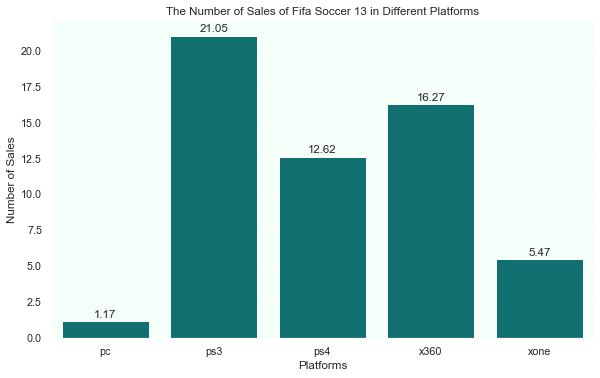

In [97]:
# Creating bar plot
fig, ax = plt.subplots(figsize=(10,6), dpi=70)
sns.barplot(data=gta5.reset_index(), x='platform', y='total_sales', color='teal')

# Creating label on top of each bar
for row in gta5.reset_index().itertuples():
    ax.text(row.Index, 
            row.total_sales+0.1, 
            s=round(row.total_sales, 2), 
            horizontalalignment='center',
            verticalalignment='bottom')
ax.set_xlabel('Platforms')
ax.set_ylabel('Number of Sales')
plt.title('The Number of Sales of Fifa Soccer 13 in Different Platforms');

From the above plot, we can see that the sales of Grand Theft Auto 5 agrees with the general trend of sales we concluded earlier. The game's sales in PlayStation 3, PlayStation 4, and Xbox 360 have a positive trend. In general, the game had good reviews even though it did not help to boost sales on Xbox One nor PC.

In [98]:
print("Average review scores of Grand Theft Auto 5:\n\tCritic's Score: {}\n\tUser's Score: {}".format(gta5.critic_score.mean(),
                                                                                           gta5.user_score.mean()))

Average review scores of Grand Theft Auto 5:
	Critic's Score: 96.8
	User's Score: 8.08


#### Question 3.8: Take a look at the general distribution of games by genre. What can we say about the most profitable genres. <a class="anchor" id="step_3_8"></a>

In [99]:
data_2008.groupby('genre').sum()

,na_sales,eu_sales,jp_sales,other_sales,user_score,year_of_release,critic_score,total_sales
genre,,,,,,,,
Action,282.24,220.31,38.15,74.57,"5,776.00",1694068,"58,083.08",615.27
Adventure,14.20,12.86,2.66,3.89,877.80,245471,"8,367.65",33.61
Fighting,45.49,22.98,7.77,9.67,"1,073.90",309778,"10,891.33",85.91
Misc,95.77,50.53,9.15,16.51,"1,195.20",353956,"12,418.33",171.96
Platform,62.08,41.74,18.43,12.59,805.90,227357,"8,338.42",134.84
Puzzle,9.93,5.33,2.25,1.60,280.20,76402,"2,802.00",19.11
Racing,44.48,54.01,6.46,15.42,"1,173.40",362104,"12,728.66",120.37
Role-Playing,92.08,58.06,43.03,20.11,"2,299.00",629736,"22,792.66",213.28
Shooter,241.17,166.18,12.96,55.86,"2,474.00",756430,"26,800.83",476.17


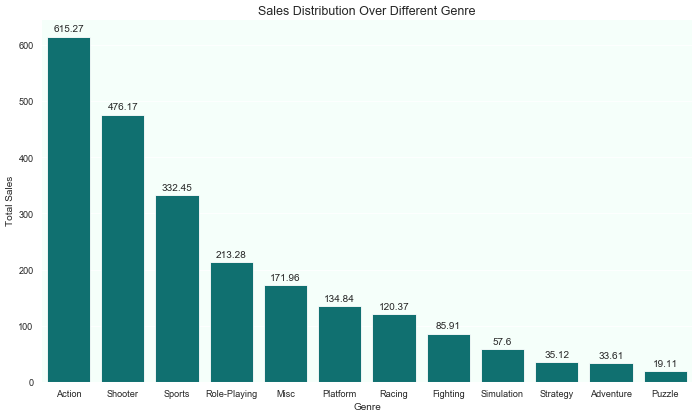

In [100]:
genre = data_2008.groupby('genre').sum().sort_values(by='total_sales', ascending=False).reset_index()

# Creating bar plot
fig, ax = plt.subplots(figsize=(14,8), dpi=60)
sns.barplot(data=genre, x='genre', y='total_sales', color='teal')

# Creating label on top of each bar
for row in genre.itertuples():
    ax.text(row.Index, 
            row.total_sales+5, 
            s=round(row.total_sales, 2), 
            horizontalalignment='center',
            verticalalignment='bottom')
ax.set_xlabel('Genre')
ax.set_ylabel('Total Sales')
plt.title('Sales Distribution Over Different Genre', fontdict={'size':15});

In [101]:
data_2008.groupby('genre').agg({'total_sales':'sum', 
                               'user_score':'mean',
                               'critic_score':'mean'})\
                         .sort_values(by='total_sales', ascending=False)\
                         .reset_index().head()

,genre,total_sales,user_score,critic_score
0,Action,615.27,6.86,68.98
1,Shooter,476.17,6.58,71.28
2,Sports,332.45,6.31,72.15
3,Role-Playing,213.28,7.35,72.82
4,Misc,171.96,6.79,70.56


The most profitable genre is Action where it made USD615 million in total, followed by Shooter which generated USD476 million. 

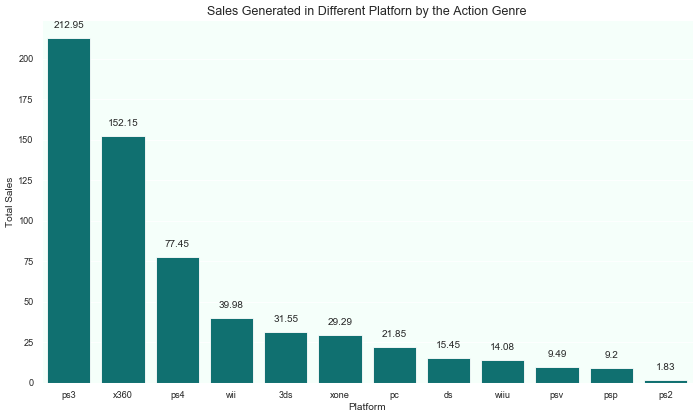

In [102]:
action = data_2008.query('genre=="Action"').groupby(['platform']).sum().sort_values(by='total_sales', ascending=False).reset_index()

# Creating bar plot
fig, ax = plt.subplots(figsize=(14,8), dpi=60)
sns.barplot(data=action, x='platform', y='total_sales', color='teal')

# Creating label on top of each bar
for row in action.itertuples():
    ax.text(row.Index, 
            row.total_sales+5, 
            s=round(row.total_sales, 2), 
            horizontalalignment='center',
            verticalalignment='bottom')
ax.set_xlabel('Platform')
ax.set_ylabel('Total Sales')
plt.title('Sales Generated in Different Platforn by the Action Genre', fontdict={'size':15});

PlayStation 3 has the most action-themed games in their platform and it contributes significantly to their high number of sales. 

**Can you generalize about genres with high and low sales?**

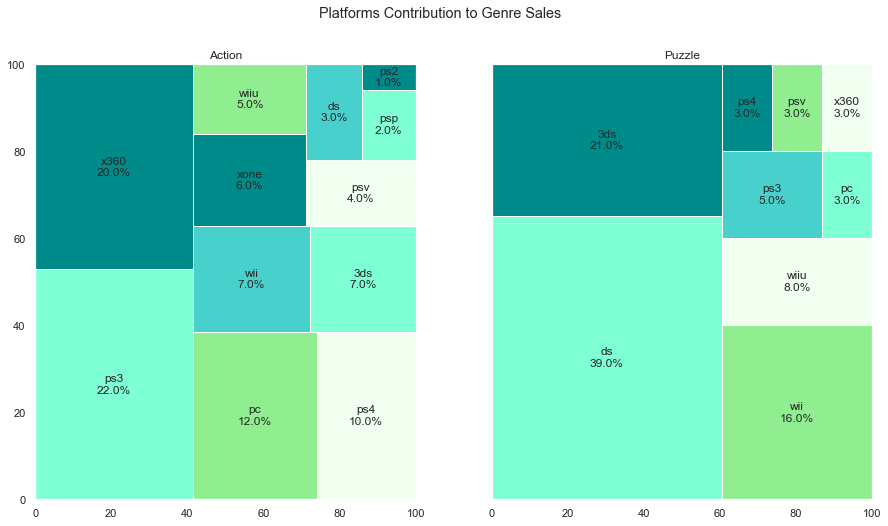

In [103]:
action = data_2008.query('genre=="Action"').groupby(['platform']).count()\
                                           .sort_values(by='total_sales', ascending=False).reset_index()
action_sizes = action.total_sales.values.tolist()
action_length = action.total_sales.sum()
action_labels = action.apply(lambda x: str(x[0])+'\n'+str(round(x['total_sales']*100/action_length))+'%', axis=1)

puzzle = data_2008.query('genre=="Puzzle"').groupby(['platform']).count()\
                                           .sort_values(by='total_sales', ascending=False).reset_index()
puzzle_sizes = puzzle.total_sales.values.tolist()
puzzle_length = puzzle.total_sales.sum()
puzzle_labels = puzzle.apply(lambda x: str(x['platform'])+'\n'+str(round(x['total_sales']*100/puzzle_length))+'%', axis=1)

fig, axs = plt.subplots(1, 2, figsize=(15, 8), sharey=True);
# plt.figure(figsize=(12,10), dpi=70)
squarify.plot(sizes=action_sizes, 
              label=action_labels, 
              color=('#7fffd4', '#008b8b', '#90ee90', '#f0fff0', '#48d1cc'),
              ax=axs[0]);
axs[0].set_title('Action')
squarify.plot(sizes=puzzle_sizes, 
              label=puzzle_labels, 
              color=('#7fffd4', '#008b8b', '#90ee90', '#f0fff0', '#48d1cc'),
              ax=axs[1]);
axs[1].set_title('Puzzle')

plt.suptitle('Platforms Contribution to Genre Sales', fontdict={'size':15});


Here we are comparing genres with the highest and lowest sales which are Action and Puzzle, respectively. One clear difference is how sales perform on popular platforms. Forty-two percent of Action's sales came from the top two selling platforms (Xbox 360 and PlayStation 3). On the contrary, most of Puzzle's sales came from the less popular platforms (Nintendo DS and Nintendo 3ds).

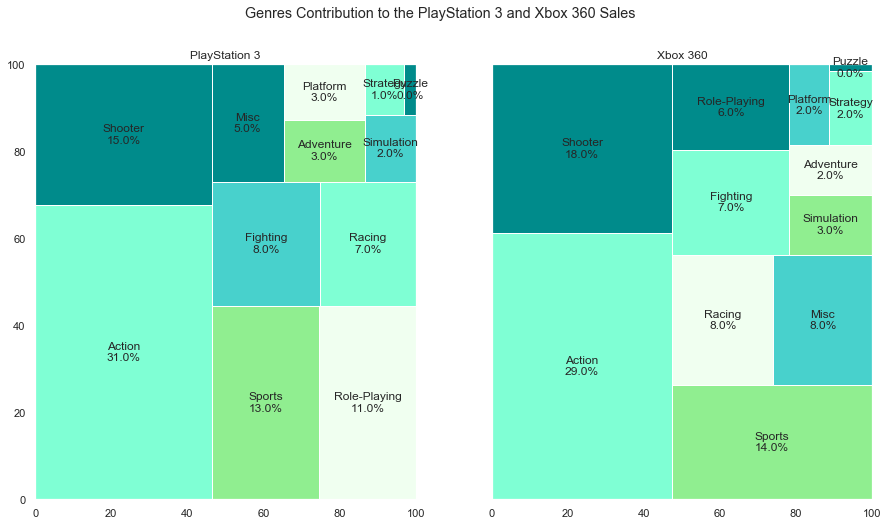

In [104]:
puzzle_ps3 = data_2008.query('platform=="ps3"').groupby(['genre']).count()\
                                               .sort_values(by='total_sales', ascending=False).reset_index()
puzzle_x360 = data_2008.query('platform=="x360"').groupby(['genre']).count()\
                                                 .sort_values(by='total_sales', ascending=False).reset_index()

puzzle_ps3_sizes = puzzle_ps3.total_sales.values.tolist()
puzzle_x360_sizes = puzzle_x360.total_sales.values.tolist()

puzzle_ps3_length = puzzle_ps3.total_sales.sum()
puzzle_x360_length = puzzle_x360.total_sales.sum()


puzzle_ps3_labels = puzzle_ps3.apply(lambda x: str(x['genre'])+'\n'+str(round(x['total_sales']*100/puzzle_ps3_length))+'%', 
                                     axis=1)
puzzle_x360_labels = puzzle_x360.apply(lambda x: str(x['genre'])+'\n'+str(round(x['total_sales']*100/puzzle_x360_length))+'%',
                                     axis=1)

fig, axs = plt.subplots(1, 2, figsize=(15, 8), sharey=True);
# plt.figure(figsize=(12,10), dpi=70)
squarify.plot(sizes=puzzle_ps3_sizes, 
              label=puzzle_ps3_labels, 
              color=('#7fffd4', '#008b8b', '#90ee90', '#f0fff0', '#48d1cc'),
              ax=axs[0]);
axs[0].set_title('PlayStation 3')
squarify.plot(sizes=puzzle_x360_sizes, 
              label=puzzle_x360_labels, 
              color=('#7fffd4', '#008b8b', '#90ee90', '#f0fff0', '#48d1cc'),
              ax=axs[1]);
axs[1].set_title('Xbox 360')

plt.suptitle('Genres Contribution to the PlayStation 3 and Xbox 360 Sales', fontdict={'size':15});

We can elaborate on this claim by looking into the composition of the genre that makes PlayStation3 and Xbox 360 sales. In both diagrams, Puzzle makes less than 1% contribution to the total sale.

### Conclusion <a class="anchor" id="conclusion_3"></a>

In this section, we analyzed some essential points:
* There was an increase in the number of the title released in the early 2000s until reached its peak at 2006. 
* PlayStation 2 is the best selling platform of all time with US\\$973 million.
* However, PlayStation 2 was discontinued in 2013. Other platforms that used to be highly popular but now have zero sales are Nintendo Wii and Nintendo DS.
* Platforms leading sales are PlayStation 3, Xbox 360, Nintendo Wii, and PlayStation 4.
* There is a moderate correlation between total sales and critic reviews. However, total sales and user critics are weakly correlated.
* The most profitable genre is Action, where it made US\\$615 million in total.

### Step 4. Create a user profile for each region <a class="anchor" id="step_4"></a>

#### For each region (NA, EU, JP), determine the top five platforms. Describe variations in their market shares from region to region. <a class="anchor" id="step_4_1"></a>

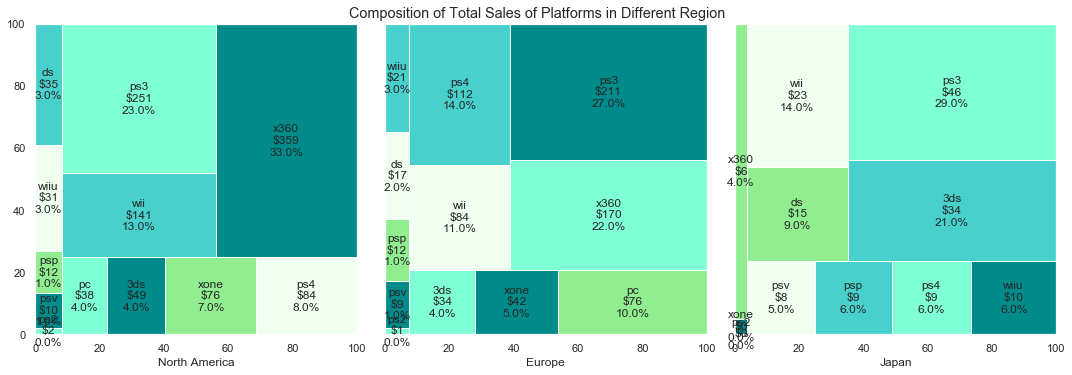

In [105]:
na_platform = data_2008[['platform', 'na_sales']].groupby(['platform']).sum().sort_values(by='na_sales').reset_index()
eu_platform = data_2008[['platform', 'eu_sales']].groupby(['platform']).sum().sort_values(by='eu_sales').reset_index()
jp_platform = data_2008[['platform', 'jp_sales']].groupby(['platform']).sum().sort_values(by='jp_sales').reset_index()

na_platform = na_platform[na_platform['na_sales']!=0]
eu_paltform = eu_platform[eu_platform['eu_sales']!=0]
jp_platform = jp_platform[jp_platform['jp_sales']!=0]

na_length = na_platform['na_sales'].sum()
eu_length = eu_platform['eu_sales'].sum()
jp_length = jp_platform['jp_sales'].sum()

na_sizes = na_platform['na_sales'].values.tolist()
eu_sizes = eu_platform['eu_sales'].values.tolist()
jp_sizes = jp_platform['jp_sales'].values.tolist()

na_labels = na_platform.apply(lambda x: str(x['platform'])+'\n'+'\$'+\
                           str(round(x['na_sales']))+'\n'+\
                           str(round((x['na_sales']*100)/na_length))+'%', axis=1)
eu_labels = eu_platform.apply(lambda x: str(x['platform'])+'\n'+'\$'+\
                           str(round(x['eu_sales']))+'\n'+\
                           str(round((x['eu_sales']*100)/eu_length))+'%', axis=1)
jp_labels = jp_platform.apply(lambda x: str(x['platform'])+'\n'+'\$'+\
                           str(round(x['jp_sales']))+'\n'+\
                           str(round((x['jp_sales']*100)/jp_length))+'%', axis=1)

fig, axs = plt.subplots(1, 3, figsize=(15, 5), sharey=True);
# f, axs = plt.subplots(3,1, figsize=(10, 20), sharex=True)
plt.tight_layout()
squarify.plot(sizes=na_sizes, 
              label=na_labels, 
              color=('#7fffd4', '#008b8b', '#90ee90', '#f0fff0', '#48d1cc'), 
              ax=axs[0]);
squarify.plot(sizes=eu_sizes, 
              label=eu_labels, 
              color=('#7fffd4', '#008b8b', '#90ee90', '#f0fff0', '#48d1cc'), 
              ax=axs[1]);
squarify.plot(sizes=jp_sizes, 
              label=jp_labels, 
              color=('#7fffd4', '#008b8b', '#90ee90', '#f0fff0', '#48d1cc'), 
              ax=axs[2]);


axs[0].set_xlabel('North America')
axs[1].set_xlabel('Europe')
axs[2].set_xlabel('Japan')

plt.suptitle('Composition of Total Sales of Platforms in Different Region', fontdict={'size':15}, y=0.99999);


In North America, XBox 360 is leading the sale of platforms with \\$359 million, followed by PlayStation 3 and Nintendo Wii. However, PlayStation 3 is the market leader in Europe and Japan, totaling \\$211 million and \\$46 million respectively. Xbox 360 comes at the second position in Europe with \\$170 million. Surprisingly Xbox 360 is not really popular in Japan, gaining only \\$6 million less than the other seven platforms. The second biggest platform in Japan is Nintendo 3ds. 

#### For each region (NA, EU, JP), determine the top five genres. Explain the difference.  <a class="anchor" id="step_4_2"></a>

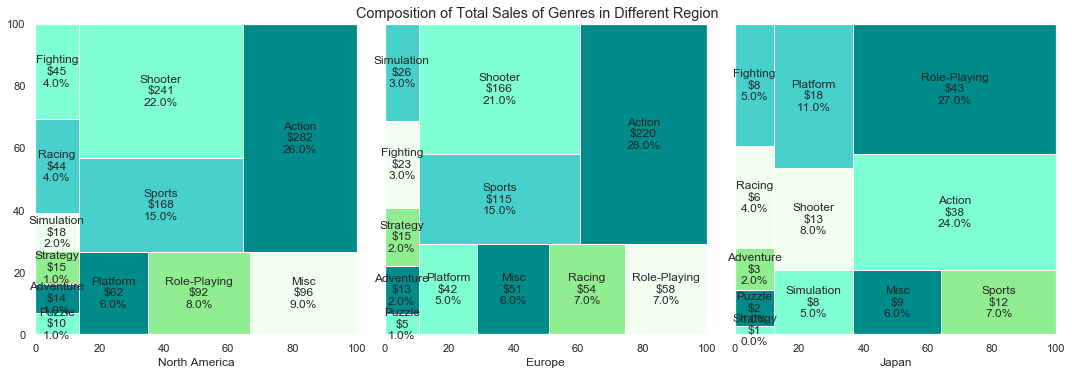

In [106]:
na_genre = data_2008[['genre', 'na_sales']].groupby(['genre']).sum().sort_values(by='na_sales').reset_index()
eu_genre = data_2008[['genre', 'eu_sales']].groupby(['genre']).sum().sort_values(by='eu_sales').reset_index()
jp_genre = data_2008[['genre', 'jp_sales']].groupby(['genre']).sum().sort_values(by='jp_sales').reset_index()

na_genre = na_genre[na_genre['na_sales']!=0]
eu_genre = eu_genre[eu_genre['eu_sales']!=0]
jp_genre = jp_genre[jp_genre['jp_sales']!=0]

na_length = na_genre['na_sales'].sum()
eu_length = eu_genre['eu_sales'].sum()
jp_length = jp_genre['jp_sales'].sum()

na_sizes = na_genre['na_sales'].sort_values().values.tolist()
eu_sizes = eu_genre['eu_sales'].sort_values().values.tolist()
jp_sizes = jp_genre['jp_sales'].sort_values().values.tolist()

na_labels = na_genre.apply(lambda x: str(x['genre'])+'\n'+'\$'+\
                           str(round(x['na_sales']))+'\n'+\
                           str(round((x['na_sales']*100)/na_length))+'%', axis=1)
eu_labels = eu_genre.apply(lambda x: str(x['genre'])+'\n'+'\$'+\
                           str(round(x['eu_sales']))+'\n'+\
                           str(round((x['eu_sales']*100)/eu_length))+'%', axis=1)
jp_labels = jp_genre.apply(lambda x: str(x['genre'])+'\n'+'\$'+\
                           str(round(x['jp_sales']))+'\n'+\
                           str(round((x['jp_sales']*100)/jp_length))+'%', axis=1)

fig, axs = plt.subplots(1, 3, figsize=(15, 5), sharey=True);
# f, axs = plt.subplots(3,1, figsize=(10, 20), sharex=True)
plt.tight_layout()
squarify.plot(sizes=na_sizes, label=na_labels, color=('#7fffd4', '#008b8b', '#90ee90', '#f0fff0', '#48d1cc'), ax=axs[0]);
squarify.plot(sizes=eu_sizes, label=eu_labels, color=('#7fffd4', '#008b8b', '#90ee90', '#f0fff0', '#48d1cc'), ax=axs[1]);
squarify.plot(sizes=jp_sizes, label=jp_labels, color=('#7fffd4', '#008b8b', '#90ee90', '#f0fff0', '#48d1cc'), ax=axs[2]);

axs[0].set_xlabel('North America')
axs[1].set_xlabel('Europe')
axs[2].set_xlabel('Japan')

plt.suptitle('Composition of Total Sales of Genres in Different Region', fontdict={'size':15}, y=0.99999);


The top three genres in North America and Europe are Action, Shooter, and Sports dominating the market almost 60%. In Japan, Role-Playing Games are the most popular, followed by Action.

#### For each region (NA, EU, JP), determine do ESRB ratings affect sales in individual regions?  <a class="anchor" id="step_4_3"></a>

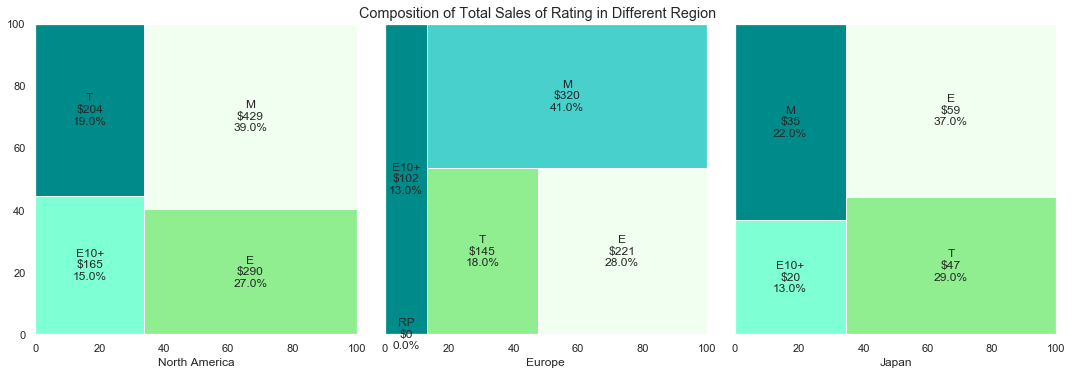

In [107]:
na_rating = data_2008[['rating', 'na_sales']].groupby(['rating']).sum().sort_values(by='na_sales').reset_index()
eu_rating = data_2008[['rating', 'eu_sales']].groupby(['rating']).sum().sort_values(by='eu_sales').reset_index()
jp_rating = data_2008[['rating', 'jp_sales']].groupby(['rating']).sum().sort_values(by='jp_sales').reset_index()

na_rating = na_rating[na_rating['na_sales']!=0]
eu_rating = eu_rating[eu_rating['eu_sales']!=0]
jp_rating = jp_rating[jp_rating['jp_sales']!=0]

na_length = na_rating['na_sales'].sum()
eu_length = eu_rating['eu_sales'].sum()
jp_length = jp_rating['jp_sales'].sum()

na_sizes = na_rating['na_sales'].to_list()
eu_sizes = eu_rating['eu_sales'].to_list()
jp_sizes = jp_rating['jp_sales'].to_list()

na_labels = na_rating.apply(lambda x: str(x['rating'])+'\n'+'\$'+\
                           str(round(x['na_sales']))+'\n'+\
                           str(round((x['na_sales']*100)/na_length))+'%', axis=1)
eu_labels = eu_rating.apply(lambda x: str(x['rating'])+'\n'+'\$'+\
                           str(round(x['eu_sales']))+'\n'+\
                           str(round((x['eu_sales']*100)/eu_length))+'%', axis=1)
jp_labels = jp_rating.apply(lambda x: str(x['rating'])+'\n'+'\$'+\
                           str(round(x['jp_sales']))+'\n'+\
                           str(round((x['jp_sales']*100)/jp_length))+'%', axis=1)

fig, axs = plt.subplots(1, 3, figsize=(15, 5), sharey=True);
# f, axs = plt.subplots(3,1, figsize=(10, 20), sharex=True)
plt.tight_layout()
squarify.plot(sizes=na_sizes, label=na_labels, color=('#7fffd4', '#008b8b', '#90ee90', '#f0fff0', '#48d1cc'), ax=axs[0]);
squarify.plot(sizes=eu_sizes, label=eu_labels, color=('#7fffd4', '#008b8b', '#90ee90', '#f0fff0', '#48d1cc'), ax=axs[1]);
squarify.plot(sizes=jp_sizes, label=jp_labels, color=('#7fffd4', '#008b8b', '#90ee90', '#f0fff0', '#48d1cc'), ax=axs[2]);

axs[0].set_xlabel('North America')
axs[1].set_xlabel('Europe')
axs[2].set_xlabel('Japan')

plt.suptitle('Composition of Total Sales of Rating in Different Region', fontdict={'size':15}, y=0.99999);


Game rated as Mature is dominating the market in North America and Europe with almost 40% share. In Japan, the most popular are games rated as Everyone. In terms if hgnre, Action games are very popualr in n north amercain and europe while japan prefers role-playing games in particular. The rating preference follows the same as genre, Matreu rated games are ppakar in Nirth american and euroe. Whule in JP E rated gamed are very successful,

### Conclusion  <a class="anchor" id="conclusion_4"></a>

In this section, we learned that in Europe and Japan, Xbox 360 is very popular. However, PlayStation 3 is the market leader in Europe and Japan.
The top genres in North America and Europe are Action, while in Japan, Role-Playing Games are the most popular. The rating preference follows the same trend as that of the genre; Mature rated games are popular in North America and Europe. While in Japan, E-rated games are very successful.

### Step 5. Hypothesis Tests  <a class="anchor" id="step_5"></a>

In this part we are going to do hypothesis tests to answer some question regarding our dataset. 

#### Testing hypothesis between average user ratings of the Xbox One and PC platforms  <a class="anchor" id="step_5_1"></a>

Extracting the data we need,

In [108]:
xone = data_2008.query('platform == "xone"').user_score
xone.head()

165   7.90
179   5.40
242   6.40
270   6.20
373   4.10
Name: user_score, dtype: float64

In [109]:
pc = data_2008.query('platform == "pc"').user_score
pc.head()

85    7.60
192   4.00
218   8.20
313   8.10
458   3.90
Name: user_score, dtype: float64

Compare the statistical summaries to get a general idea about the distribution,

In [110]:
compare = pd.DataFrame(data=[[xone.shape[0], pc.shape[0]],
                             [xone.mean(), pc.mean()],
                             [xone.median(), pc.median()],
                             [xone.std(), pc.std()]],
                       columns=['Xbox One User Score', 'PC User Score'], 
                       index=['Count','Mean', 'Median', 'Standard Deviation'] )
pd.options.display.float_format = "{:,.2f}".format
compare

,Xbox One User Score,PC User Score
Count,170.00,441.00
Mean,6.52,6.65
Median,6.80,6.90
Standard Deviation,1.38,1.53


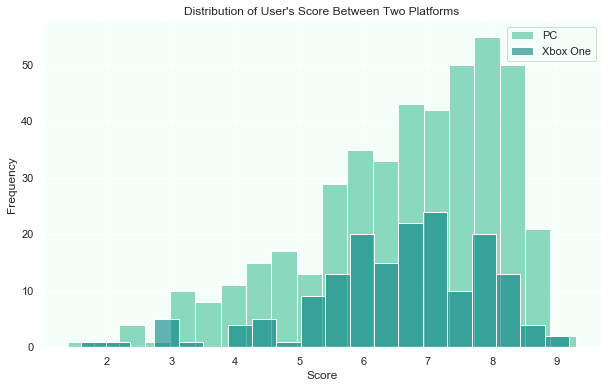

In [111]:
plt.figure(figsize=(10,6))
sns.histplot(pc, color='mediumaquamarine', bins=20)
sns.histplot(xone, color='teal', bins=20, alpha=0.6)
plt.legend(['PC', 'Xbox One'])
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.title("Distribution of User's Score Between Two Platforms");

The histogram of user's review for Xbox One look resembles a bell-shaped ditstribution although left skewed with the mean around 7. The distribution of reviews in PC is more skewed and has higher frequency since the number of samples are higher.

**Null Hypothesis and Alternate Hypothesis**

For the first test, we setup a hypothesisi as follows:
   * $H_0$: There are no difference between the user's review between Xbox One and PC.
   * $H_1$: The user's review between the Xbox One and PC are not the same.

We need to check the normality assumptions for both distribution using the Shapiro Wilk Test,

In [112]:
_, p_s = shapiro(xone)
print('Shapiro-Wilk p-value is {}'.format(p_s))

# For this test we assume the H_0: The sample has a Gaussian distribution

alpha = 0.05
if p_s > alpha:
    print('Sample of Xbox One plan looks Gaussian (fail to reject H_0)')
else:
    print('Sample of Xbox One plan does not look Gaussian (reject H_0)')

Shapiro-Wilk p-value is 1.1026140782632865e-05
Sample of Xbox One plan does not look Gaussian (reject H_0)


In [113]:
_, p_s = shapiro(pc)
print('Shapiro-Wilk p-value is {}'.format(p_s))

# For this test we assume the H_0: The sample has a Gaussian distribution

alpha = 0.05
if p_s > alpha:
    print('Sample of PC looks Gaussian (fail to reject H_0)')
else:
    print('Sample of PC does not look Gaussian (reject H_0)')

Shapiro-Wilk p-value is 1.5806839344378876e-12
Sample of PC does not look Gaussian (reject H_0)


The Shapiro-Wilk test shows that both distributions **failed** the test thus cannot be considered as normally distributed. In this case we cannot use the T-test but rather need to use the Mann-Whitney U-Test.

We need to remove the outliers to satisfy the requirement of the Mann-Whitney Test:

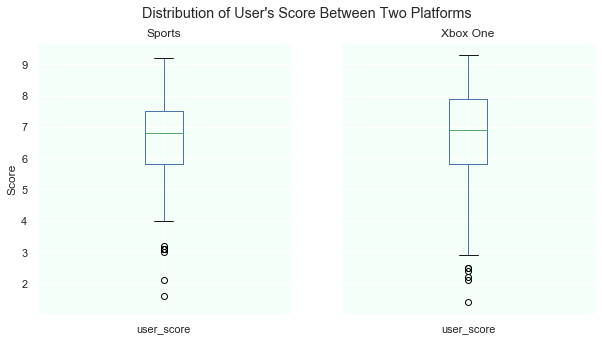

In [114]:
f, axs = plt.subplots(1, 2, figsize=(10,5), sharey=True)

xone.plot(kind='box', ax=axs[0])
plt.title('Xbox One');
axs[0].set_ylabel('Score');
axs[0].set_title('Sports');

pc.plot(kind='box', ax=axs[1])
plt.suptitle("Distribution of User's Score Between Two Platforms");


Both distribution have outliers on the lower side of the scale.

In [115]:
def outliers(col):
    q1 = col.quantile(0.25)
    q3 = col.quantile(0.75)
    iqr = q3 - q1
    upper = q3 + (1.5 * iqr)
    lower = q1 - (1.5 * iqr)
    return (lower, upper)

xone_lower, xone_upper = outliers(xone)
pc_lower, pc_upper = outliers(pc)

In [116]:
xone_trimmed = xone[(xone > xone_lower) & (xone < xone_upper)]
xone_trimmed.head()

165   7.90
179   5.40
242   6.40
270   6.20
373   4.10
Name: user_score, dtype: float64

In [117]:
pc_trimmed = pc[(pc > pc_lower) & (pc < pc_upper)]
pc_trimmed.head()

85    7.60
192   4.00
218   8.20
313   8.10
458   3.90
Name: user_score, dtype: float64

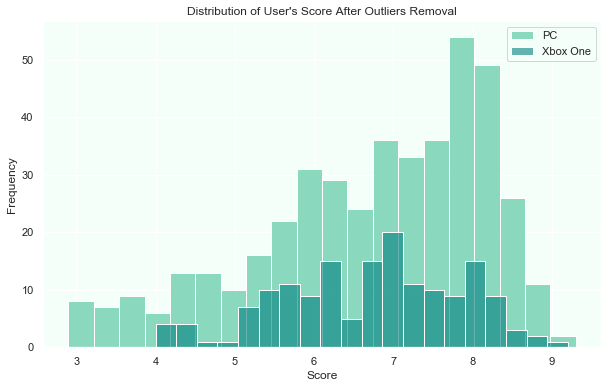

In [118]:
plt.figure(figsize=(10,6))
sns.histplot(pc_trimmed, color='mediumaquamarine', bins=20)
sns.histplot(xone_trimmed, color='teal', bins=20, alpha=0.6)
plt.legend(['PC', 'Xbox One'])
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.title("Distribution of User's Score After Outliers Removal");

After removing outliers, distribution of Xbox One's user's review looks more like Gaussian. The distribution of PC, on the other hand, still shows a skewed distribution.

Continuing our analysis with the Mann-Whitney Test:

In [119]:
_, p_value = mannwhitneyu(xone_trimmed, pc_trimmed)
print('Mann Whitney p-value {}'.format(p_value))

alpha = 0.05
if p_value > alpha:
    print('Same distribution (fail to reject H_0)')
else:
    print('Different distribution (reject H_0)')

Mann Whitney p-value 0.14551267660313272
Same distribution (fail to reject H_0)


The U test shows that the p-value is greater than the significance value, so we **do not reject** the null hypothesis. There is **insufficient evidence** to say that the user's reviews between Xbox One and PC genre are different.

#### Testing hypothesis between user ratings for the Action and Sports genres  <a class="anchor" id="step_5_2"></a>

The second hypothesis to evaluate is whether the average user rating between Action and Sports are different. For this test we formulate the following hypothesis:

**Null Hypothesis and Alternate Hypothesis**

For the first test, we setup a hypothesisi as follows:
   * $H_0$: There are no difference between the user's review for the Action and Sports genre.
   * $H_1$: The user's review between the Action and Sports genres are not the same.

First we need to extract the data for this purpose,

In [120]:
action = data_2008.query('genre == "Action"').user_score
action.head()

16    8.20
23    8.10
42    8.30
81    6.60
118   8.30
Name: user_score, dtype: float64

In [121]:
sports = data_2008.query('genre == "Sports"').user_score
sports.head()

3     8.00
15    7.40
77    4.30
94    5.00
126   4.30
Name: user_score, dtype: float64

In [122]:
compare = pd.DataFrame(data=[[action.shape[0], sports.shape[0]],
                             [action.mean(), sports.mean()],
                             [action.median(), sports.median()],
                             [action.std(), sports.std()]],
                       columns=['Action User Score', 'Sports User Score'], 
                       index=['Count','Mean', 'Median', 'Standard Deviation'] )
pd.options.display.float_format = "{:,.2f}".format
compare

,Action User Score,Sports User Score
Count,842.00,323.00
Mean,6.86,6.31
Median,7.20,6.50
Standard Deviation,1.33,1.48


The mean between two samples are quite similiar but there are quite significant difference in the median.

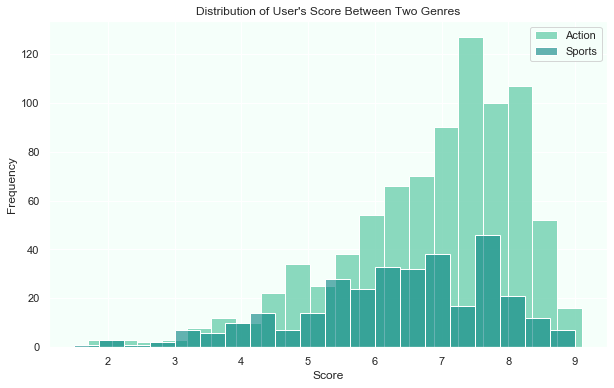

In [123]:
plt.figure(figsize=(10,6))
sns.histplot(action, color='mediumaquamarine', bins=20)
sns.histplot(sports, color='teal', bins=20, alpha=0.6)
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.legend(['Action', 'Sports'])
plt.title("Distribution of User's Score Between Two Genres");


The distribution of the Sports genre is a quite spreaded without a clear peak. It does not look like normally distributed. The Action genres has higher peaks because of mare sample for this dataset. The distribution is also left-skewed with a peak around 7 to 8.

We are going to test if they can be considered as normally distributed,

In [124]:
_, p_s = shapiro(action)
print('Shapiro-Wilk p-value is {}'.format(p_s))

# For this test we assume the H_0: The sample has a Gaussian distribution

alpha = 0.05
if p_s > alpha:
    print('Sample of the Action genre looks Gaussian (fail to reject H_0)')
else:
    print('Sample of the Action genre does not look Gaussian (reject H_0)')

Shapiro-Wilk p-value is 3.362531583034451e-19
Sample of the Action genre does not look Gaussian (reject H_0)


In [125]:
_, p_s = shapiro(sports)
print('Shapiro-Wilk p-value is {}'.format(p_s))

# For this test we assume the H_0: The sample has a Gaussian distribution

alpha = 0.05
if p_s > alpha:
    print('Sample of the Sports genre looks Gaussian (fail to reject H_0)')
else:
    print('Sample of the Sports genre does not look Gaussian (reject H_0)')

Shapiro-Wilk p-value is 2.5496527200630226e-07
Sample of the Sports genre does not look Gaussian (reject H_0)


Both distributions failed the normality test so we have to check the hypothesis using Mann-Whitney Test. 

Checking for outliers,

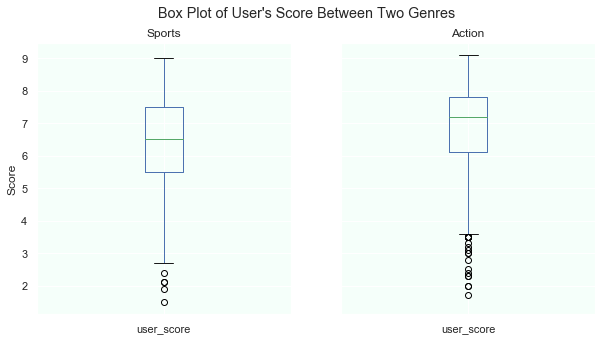

In [126]:
f, axs = plt.subplots(1, 2, figsize=(10,5), sharey=True)

sports.plot(kind='box', ax=axs[0])
plt.title('Sports');
axs[0].set_ylabel('Score');
axs[0].set_title('Sports');

action.plot(kind='box', ax=axs[1])
axs[1].set_title('Action');
plt.suptitle("Box Plot of User's Score Between Two Genres");

There are clear outliers in the lower side of both distributions that we need to remove to satisfy the non parametric test.

In [127]:
action_lower, action_upper = outliers(action)
sports_lower, sports_upper = outliers(sports)

action_trimmed = action[(action > action_lower) & (action < action_upper)]
sports_trimmed = sports[(sports > sports_lower) & (sports < sports_upper)]

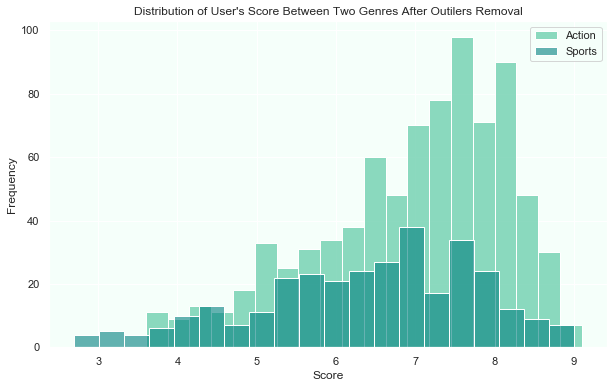

In [128]:
plt.figure(figsize=(10,6))
sns.histplot(action_trimmed, color='mediumaquamarine', bins=20)
sns.histplot(sports_trimmed, color='teal', bins=20, alpha=0.6)
plt.legend(['Action', 'Sports'])
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.title("Distribution of User's Score Between Two Genres After Outilers Removal");


The histograms show distributions of the Action and Sports user's score after removing the ouliers. We are going to procees with the hypothesis test below:

In [129]:
_, p_value = mannwhitneyu(action_trimmed, sports_trimmed)
print('Mann Whitney p-value {}'.format(p_value))

alpha = 0.05
if p_value > alpha:
    print('Same distribution (fail to reject H_0)')
else:
    print('Different distribution (reject H_0)')

Mann Whitney p-value 4.751141677981074e-11
Different distribution (reject H_0)


The U test shows that the p-value is less than the significance value, so we **reject** the null hypothesis. There is **enough evidence** to say that the user's reviews between the Action genre and the Sports genre are different.

### Conclusion  <a class="anchor" id="conclusion_5"></a>

From the hypotheses we concluded that the user's reviews between Xbox One and PC genre are the same. On the contrary  the user's reviews between the Action genre and the Sports genre are different.

### Step 6. General Conclusion  <a class="anchor" id="step_6"></a>

In this project, we made several analyses about our dataset. Some general conclusion that we can draw for 2017 forecast are the following:
* PlayStation2 is the best-selling platform of all time. However, we didn't include it in our analysis for 2017 since the platform has been discontinued.
* We focused the analysis more on PlayStation 4 because, among the current platforms generating sales, PlayStation 4 is the only platform that is still active. The other platforms, PlayStation 3, Xbox 360, and Nintendo Wii, either have been officially discontinued or reaching the end of their lifespan.
* We need to pay attention to expert review since there is a moderate correlation to total sales.
* To gain more sales, we need to emphasize ins selling games from the Action, Shooter, and Role Playing genres as they are the top-selling genre in all regions.
* Additionally, the hypothesis test indicates that the user's reviews between the Xbox One and PC genres are the same, and the user's reviews between the Action and Sports genres are different.